Import python libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
df=data=pd.read_csv('/content/energydata_complete.csv')
df=pd.read_csv('/content/energydata_complete.csv')
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

2.Info


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

3.Shape


In [ ]:
df.shape

(19735, 29)

In [ ]:
y=df['T2']
x=df['T6']

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

Find Missing Values


In [ ]:
def find_missing_values(df):
  missing_values = df.isnull().sum()
  return missing_values
missing_values = find_missing_values(df)
print(missing_values)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


duplicated values


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.dropna()
df.head()


Appliances     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0          60  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1          60  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2          50  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3          50  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4          60  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  45.566667  17.166667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  45.992500  17.166667  ...  17.066667  45.56  6.483333        733.6    92.0   
2  45.890000  17.166667  ...  17.000000  45.50  6.366667        733.7    92.0   
3  45.723333  17.166667  ...  17.000000  45.40  6.250000        733.8    92.0   
4  45.530000  17.200000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 27 columns]

In [ ]:
df.drop_duplicates()

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [ ]:
y=df['Appliances']
x=df.drop(['Appliances'],axis=1)

In [ ]:
x.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
y

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
  mean=df[column].mean()
  median=df[column].median()
  mode=df[column].mode()[0]
  std_dev=df[column].std()
  print(f"Column: {column}")
  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Mode: {mode}")
  print(f"Standard Deviation: {std_dev}")
  print()


Column: Appliances
Mean: 97.6949581960983
Median: 60.0
Mode: 50
Standard Deviation: 102.52489053740692

Column: T1
Mean: 21.686571386747413
Median: 21.6
Mode: 21.0
Standard Deviation: 1.6060656448139288

Column: RH_1
Mean: 40.259739279782515
Median: 39.6566666666667
Mode: 39.09
Standard Deviation: 3.979298830435562

Column: T2
Mean: 20.341219463847917
Median: 20.0
Mode: 19.2
Standard Deviation: 2.1929735335219864

Column: RH_2
Mean: 40.42042041370503
Median: 40.5
Mode: 40.0
Standard Deviation: 4.069812540449692

Column: T3
Mean: 22.267610984878946
Median: 22.1
Mode: 22.39
Standard Deviation: 2.006110536143508

Column: RH_3
Mean: 39.242500077205484
Median: 38.53
Mode: 37.59
Standard Deviation: 3.2545764926203464

Column: T4
Mean: 20.85533472240959
Median: 20.6666666666667
Mode: 20.39
Standard Deviation: 2.042884476985433

Column: RH_4
Mean: 39.02690378814384
Median: 38.4
Mode: 38.59
Standard Deviation: 4.341320653139047

Column: T5
Mean: 19.5921063280172
Median: 19.39
Mode: 18.6
Standar

In [ ]:
grouped_data = df.groupby(df.index)['Appliances'].mean()
print(grouped_data)

0         60.0
1         60.0
2         50.0
3         50.0
4         60.0
         ...  
19730    100.0
19731     90.0
19732    270.0
19733    420.0
19734    430.0
Name: Appliances, Length: 19735, dtype: float64


Encoding

In [ ]:
import chardet
with open('/content/energydata_complete.csv', 'rb') as f:
  result = chardet.detect(f.read())
print(result['encoding'])

ascii


In [ ]:
rawdata=pd.read_csv('/content/energydata_complete.csv',encoding='ISO-8859-1')
df=pd.DataFrame(rawdata)
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...        rv1        rv2  0  10  20  30  40  \
0  19.79  44.730000  19.000000  ...  13.275433  13.275433  0   0   0   1   0   
1  19.79  44.790000  19.000000  ...  18.606195  18.606195  0   0   0   1   0   
2  19.79  44.933333  18.926667  ...  28.642668  28.642668  0   0   0   1   0   
3  19.79  45.000000  18.890000  ...  45.410389  45.410389  0   0   0   0   1   
4  19.79  45.000000  18.890000  ...  10.084097  10.084097  0   0   0   0   1   

   50  60  70  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 37 columns]

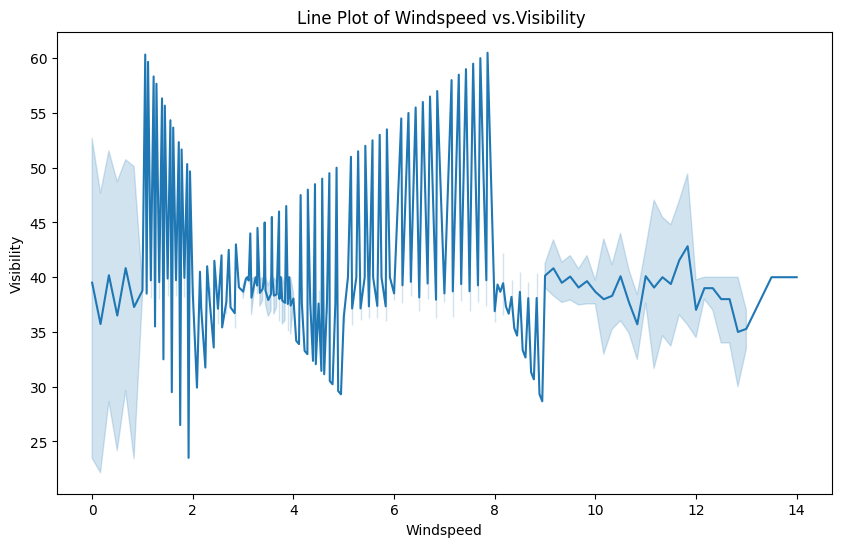

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Windspeed', y='Visibility', data=df)
plt.title('Line Plot of Windspeed vs.Visibility ')
plt.xlabel('Windspeed')
plt.ylabel('Visibility')
plt.show()

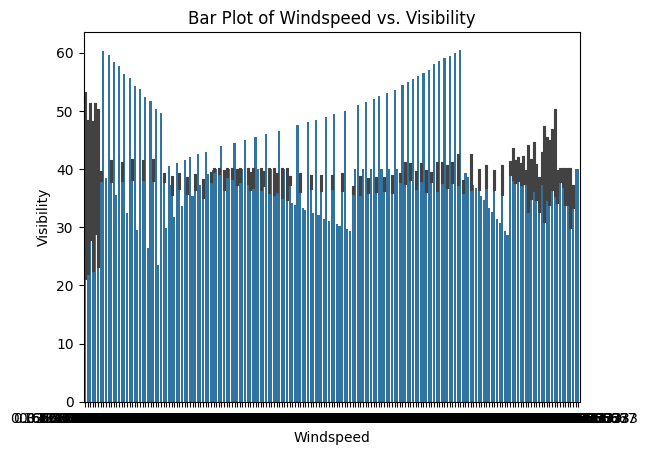

In [ ]:
sns.barplot(x='Windspeed', y='Visibility', data=df)
plt.title('Bar Plot of Windspeed vs. Visibility')
plt.xlabel('Windspeed')
plt.ylabel('Visibility')
plt.show()

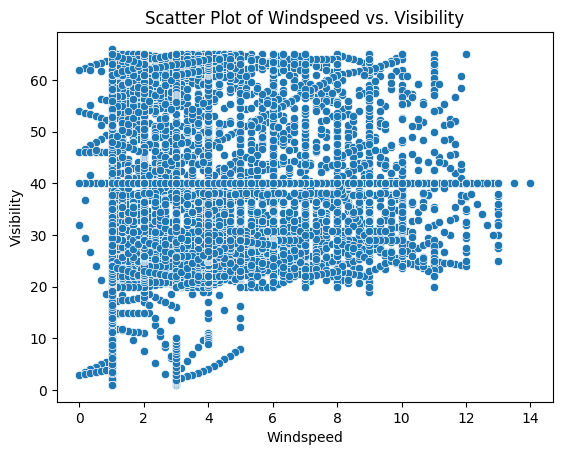

In [ ]:
sns.scatterplot(x='Windspeed', y='Visibility', data=df)
plt.title('Scatter Plot of Windspeed vs. Visibility')
plt.xlabel('Windspeed')
plt.ylabel('Visibility')
plt.show()

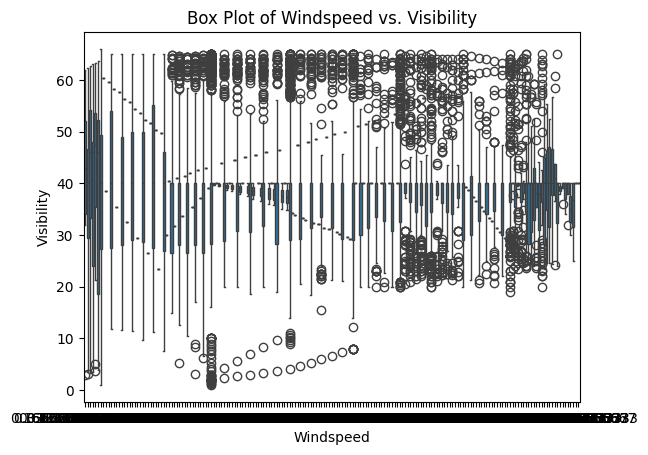

In [ ]:
sns.boxplot(x='Windspeed', y='Visibility', data=df)
plt.title('Box Plot of Windspeed vs. Visibility')
plt.xlabel('Windspeed')
plt.ylabel('Visibility')
plt.show()

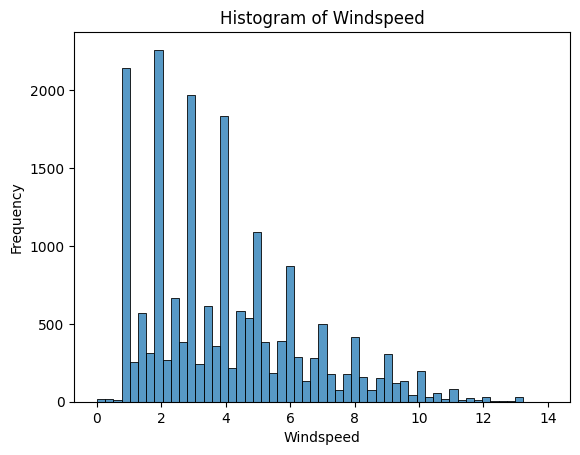

In [ ]:
sns.histplot(x='Windspeed', data=df)
plt.title('Histogram of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

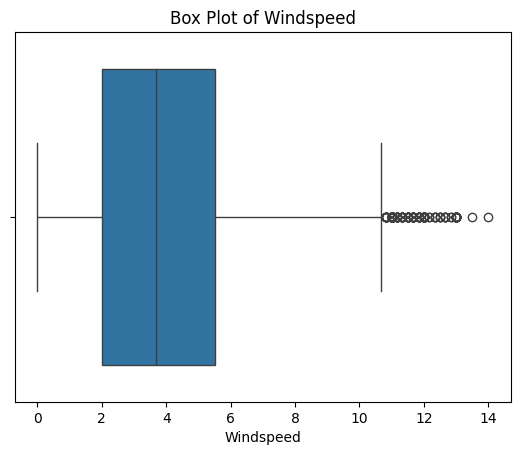

In [ ]:
sns.boxplot(x='Windspeed', data=df)
plt.title('Box Plot of Windspeed')
plt.xlabel('Windspeed')
plt.show()

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
filterd_x=df.drop(['date','lights'],axis=1)
filterd_x.head()


Appliances     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0          60  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1          60  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2          50  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3          50  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4          60  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  45.566667  17.166667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  45.992500  17.166667  ...  17.066667  45.56  6.483333        733.6    92.0   
2  45.890000  17.166667  ...  17.000000  45.50  6.366667        733.7    92.0   
3  45.723333  17.166667  ...  17.000000  45.40  6.250000        733.8    92.0   
4  45.530000  17.200000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 27 columns]

In [ ]:
filtered_y=df['Appliances']
filtered_y.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [ ]:
y=df['T2']
x=df['T6']

In [ ]:
import pandas as pd
df = pd.read_csv('/energydata_complete.csv')
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

HANDLING OUTLIERS

<Axes: >

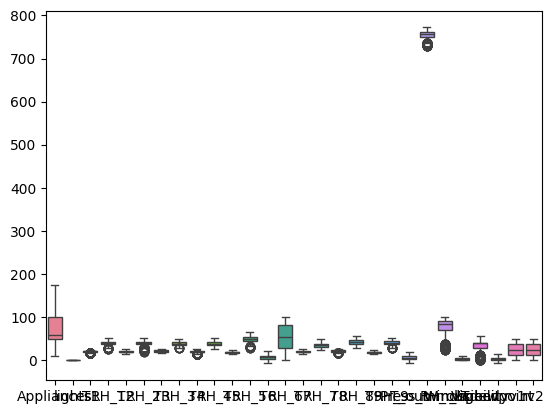

In [16]:
def handling_outlires(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].apply(lambda x:upper_bound if x>upper_bound else x)
  return df
df1=handling_outlires(df)
df1.head()
sns.boxplot(df1)


In [ ]:
num_columns=df.select_dtypes(include='number').columns

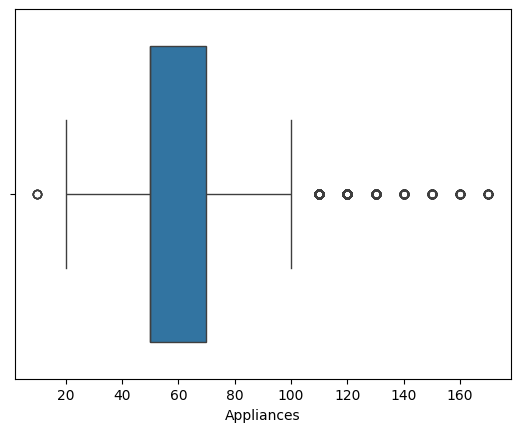

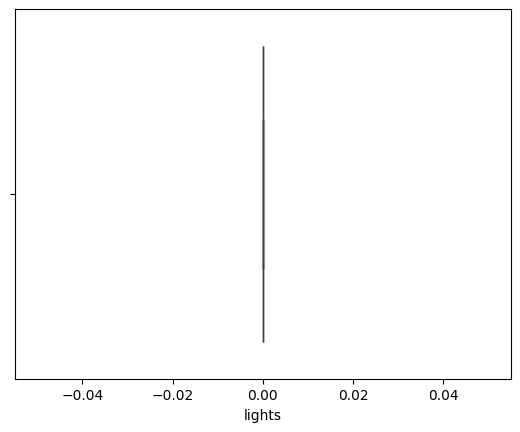

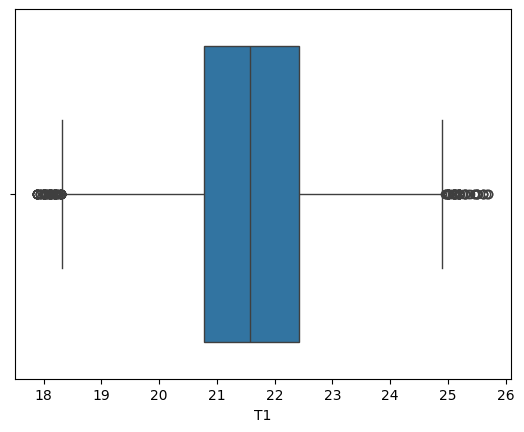

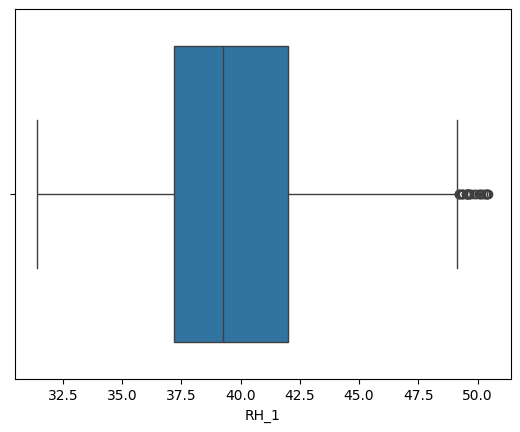

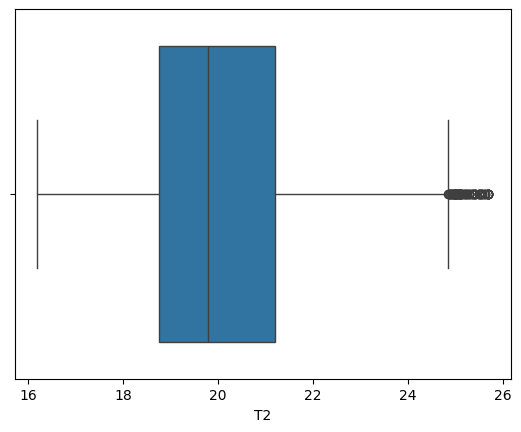

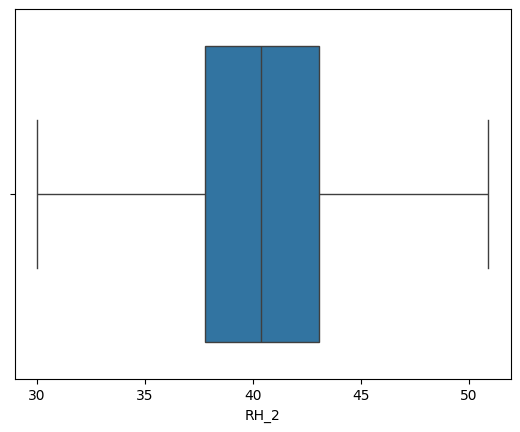

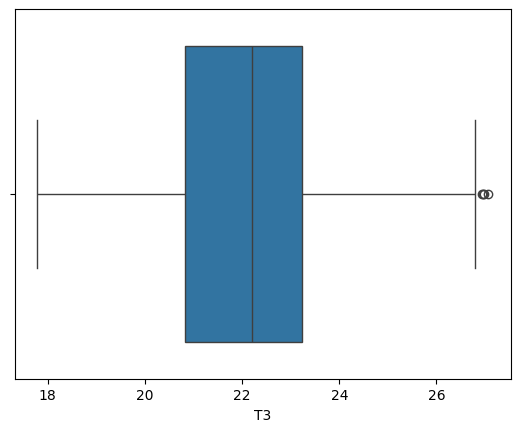

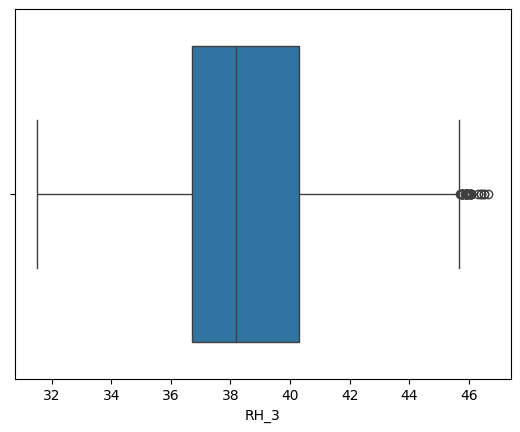

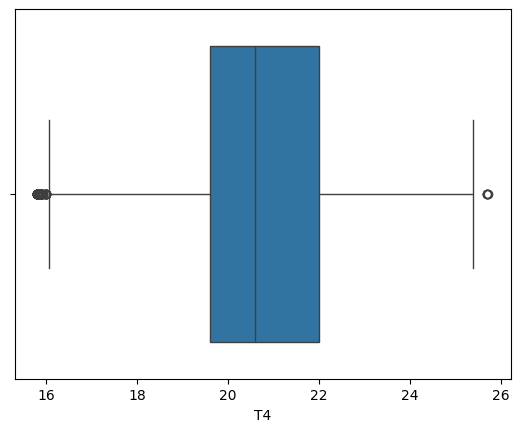

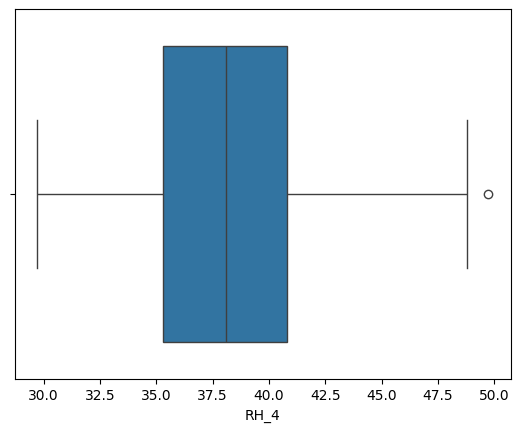

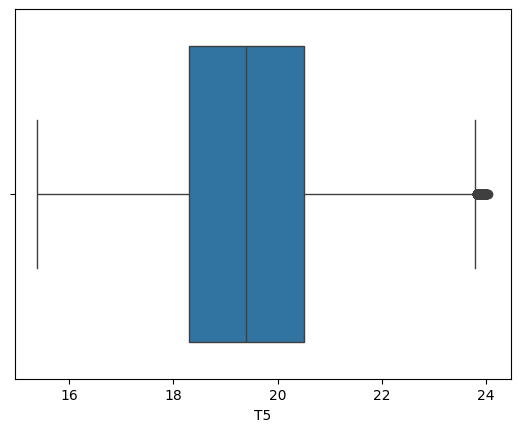

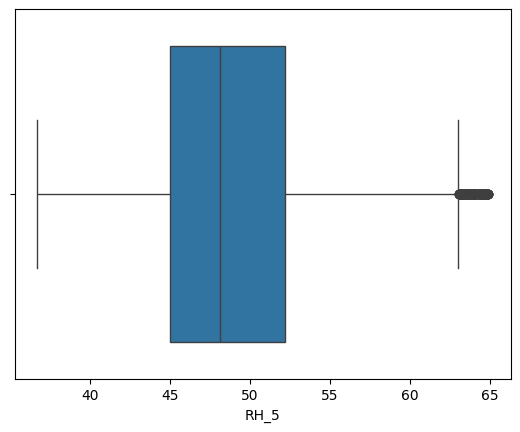

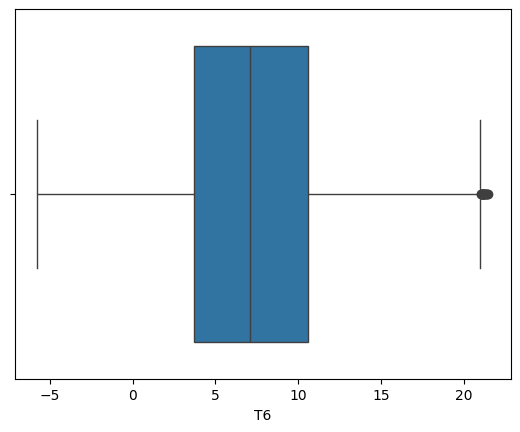

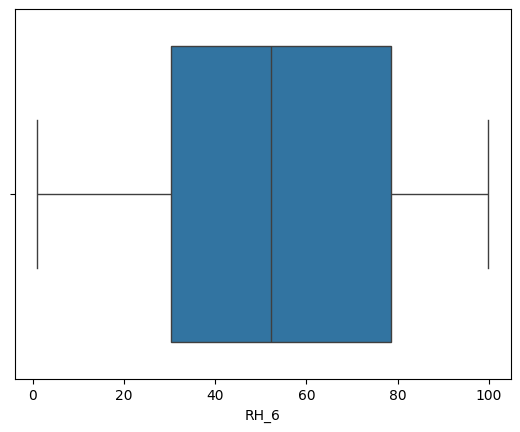

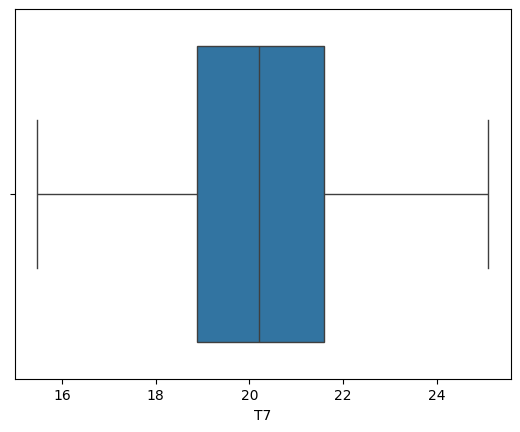

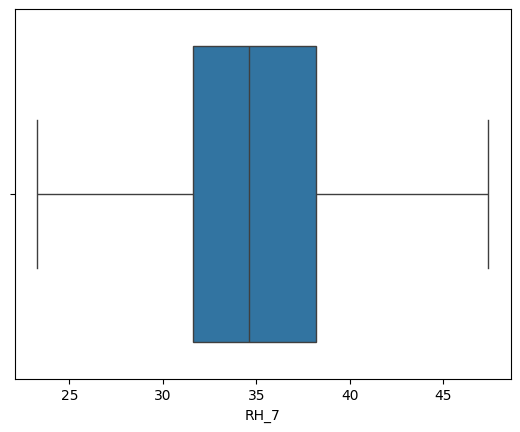

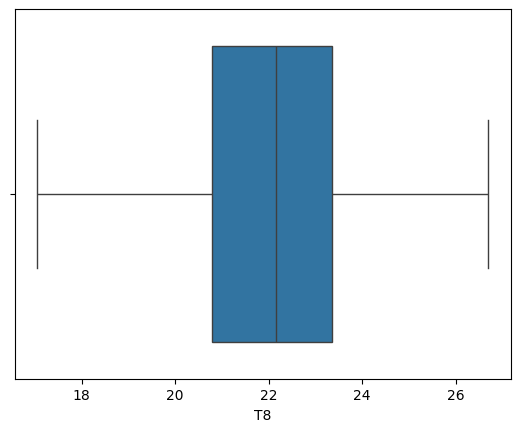

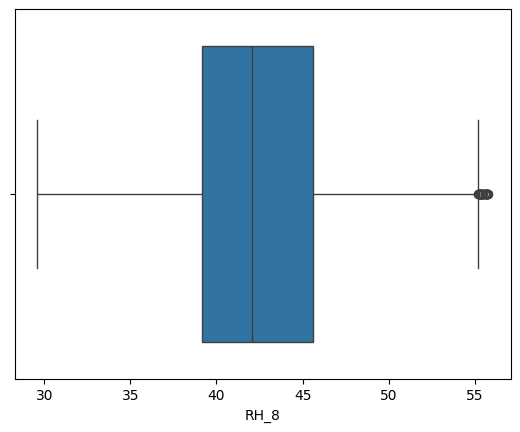

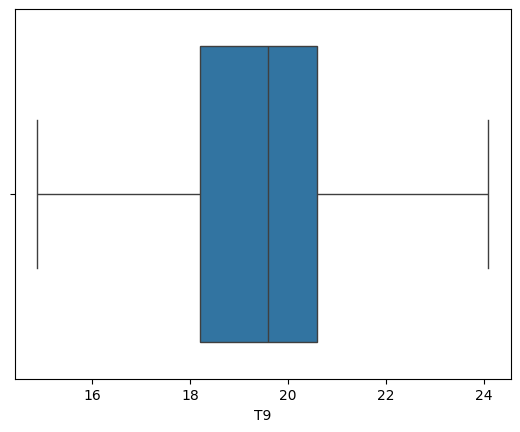

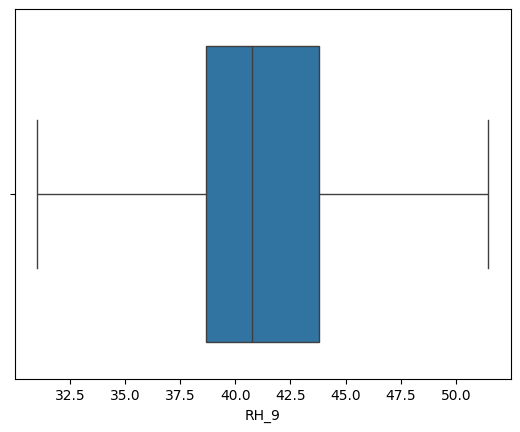

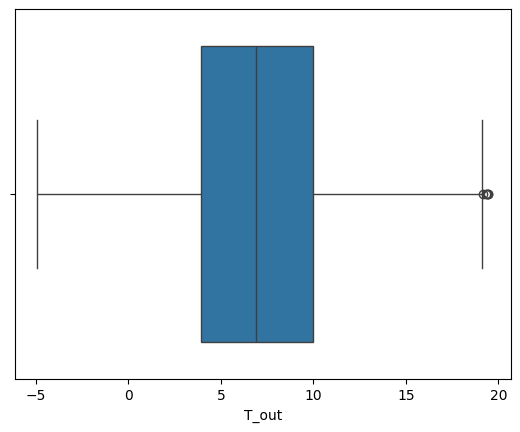

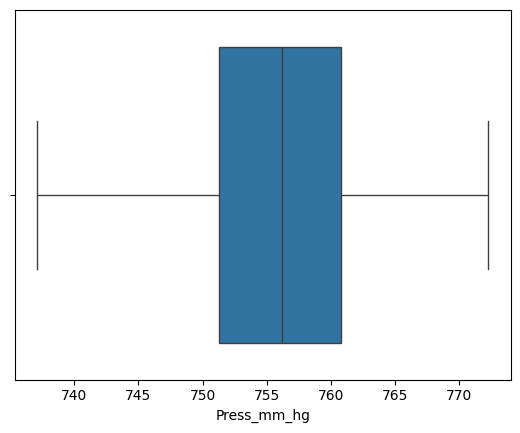

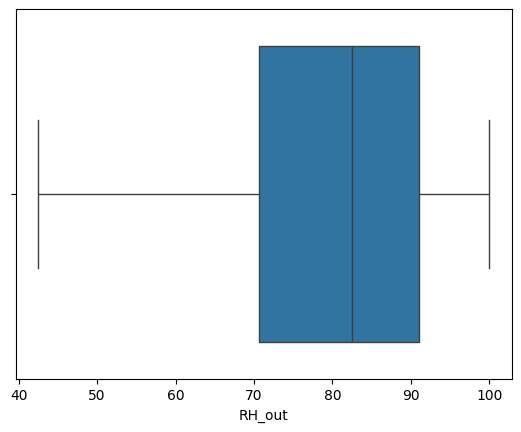

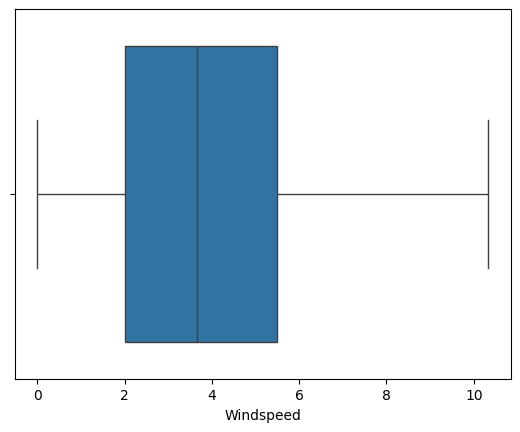

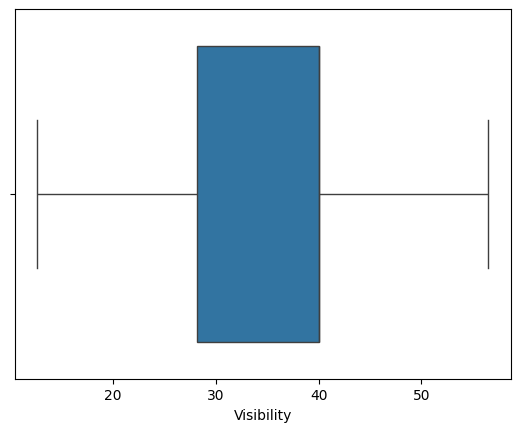

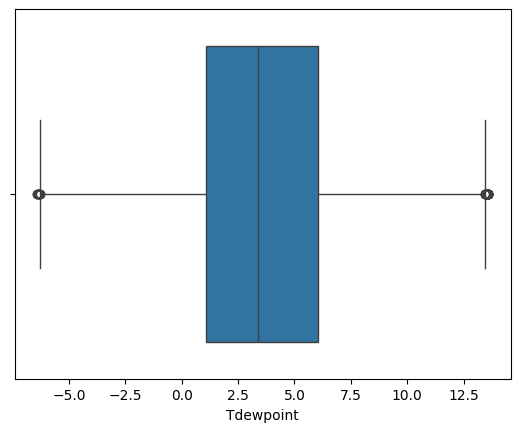

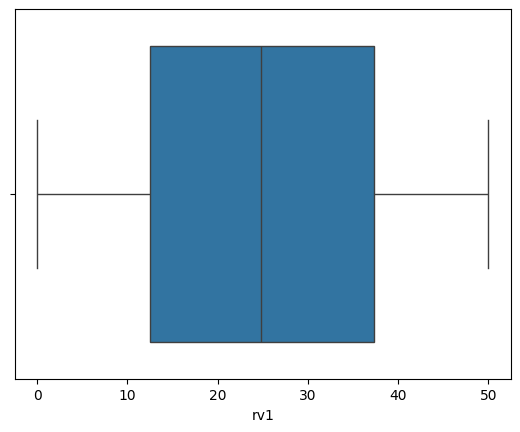

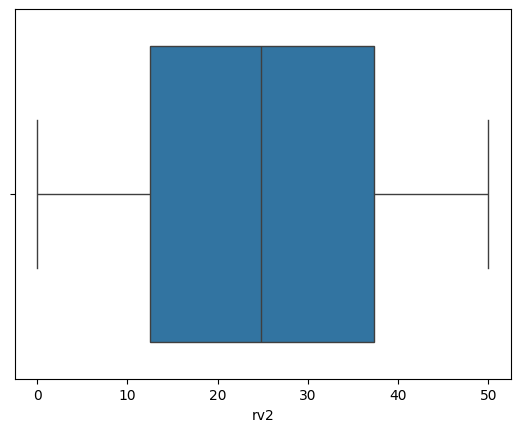

In [ ]:
for column in num_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

In [ ]:
def handling_outlires(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].apply(lambda x:upper_bound if x>upper_bound else x)
  return df

<Axes: >

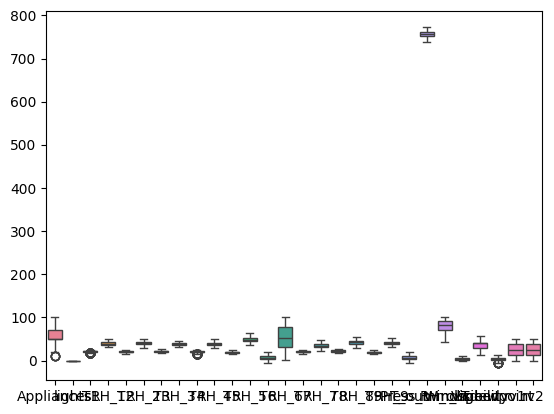

In [ ]:
df1=handling_outlires(df)
df1.head()
sns.boxplot(df1)

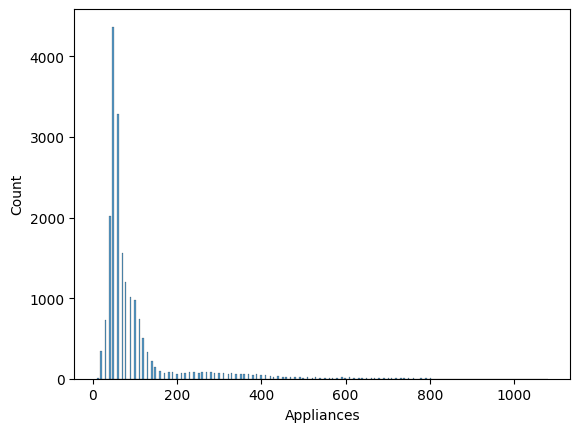

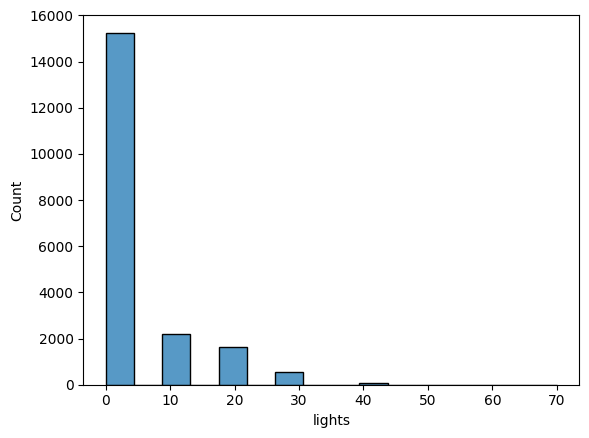

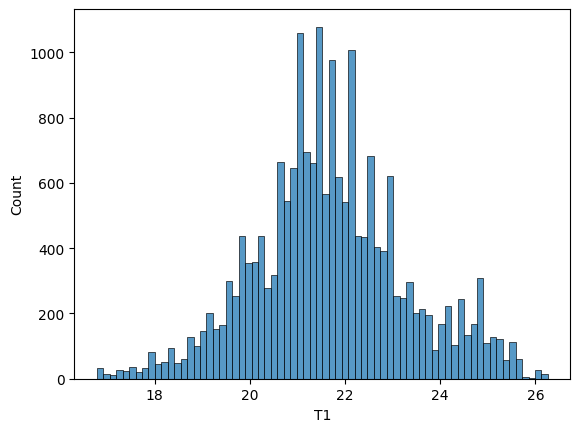

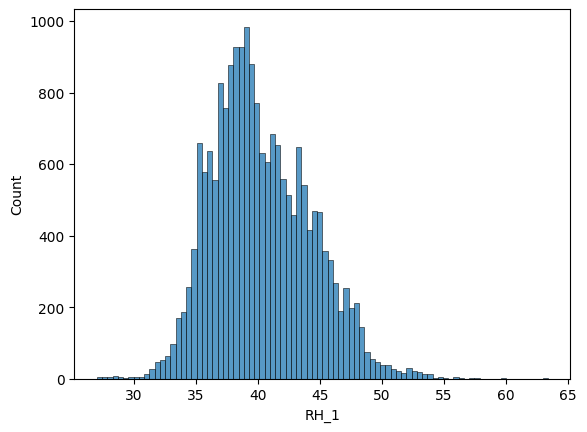

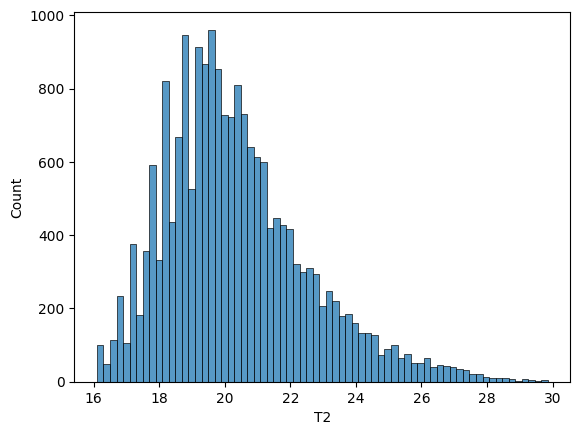

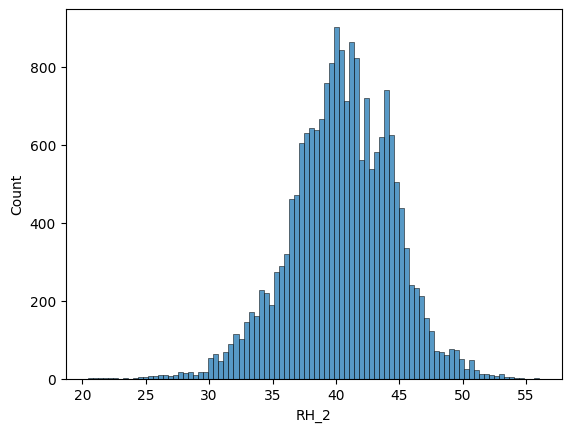

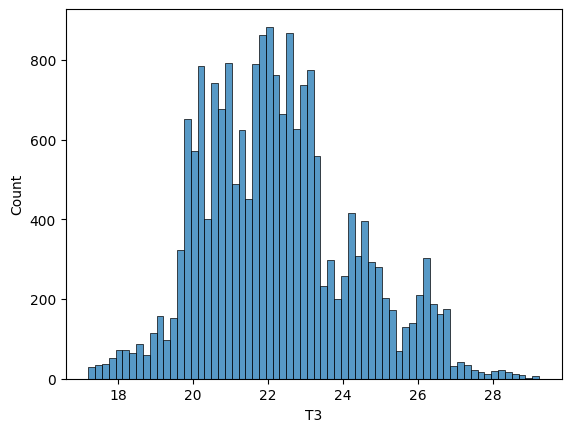

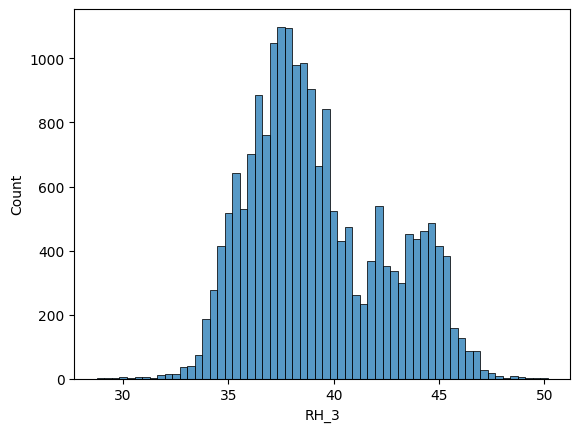

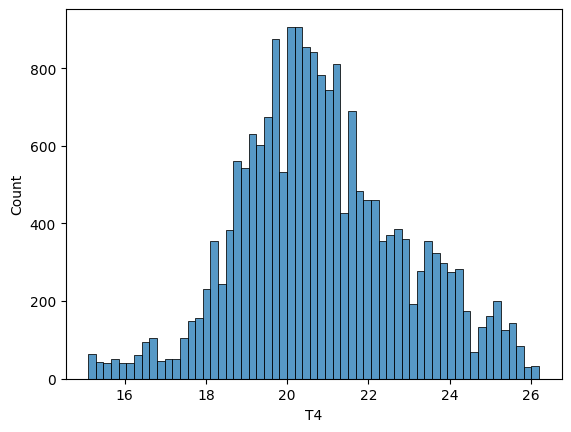

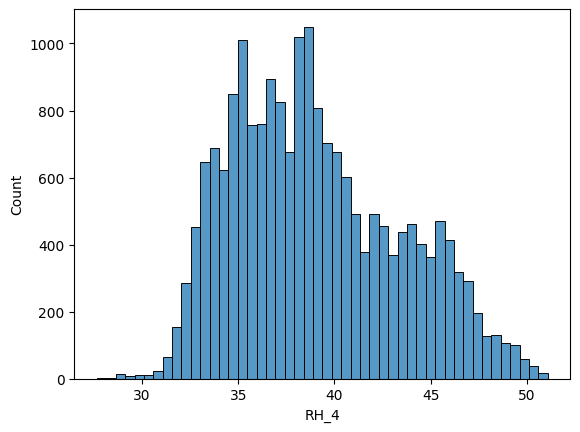

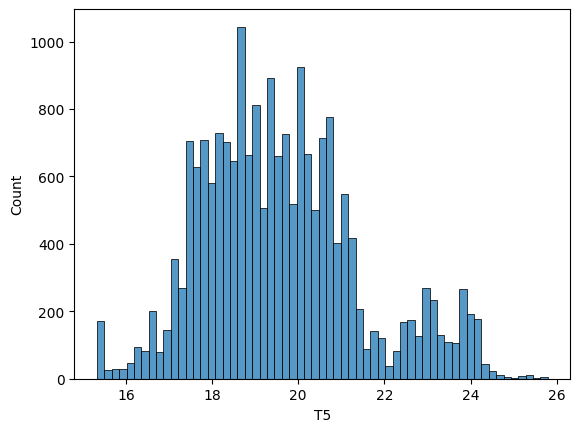

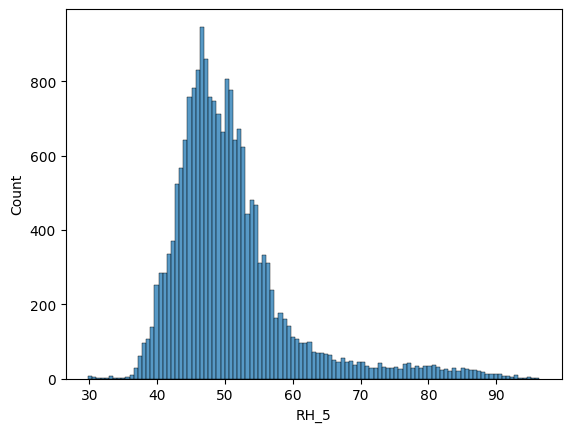

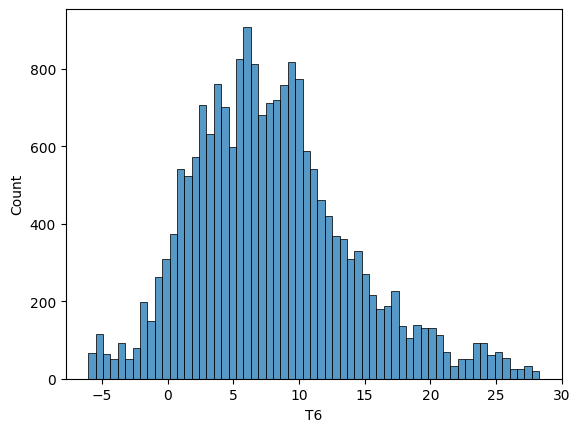

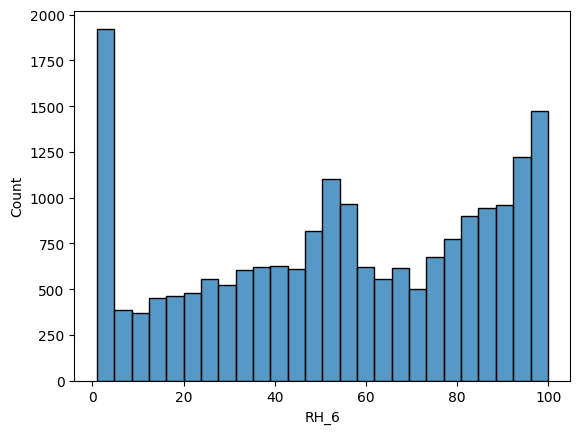

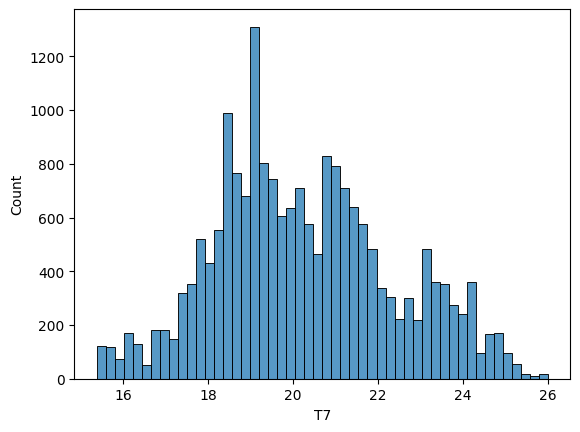

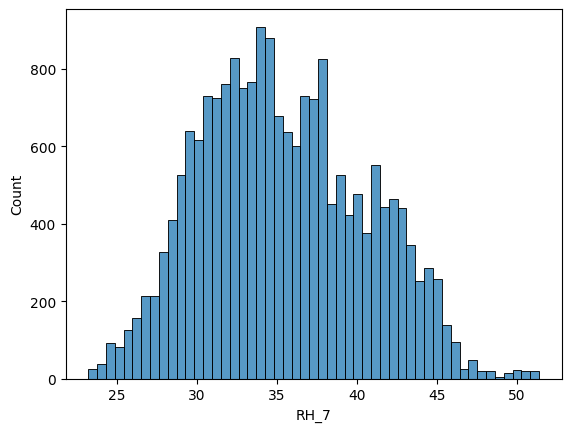

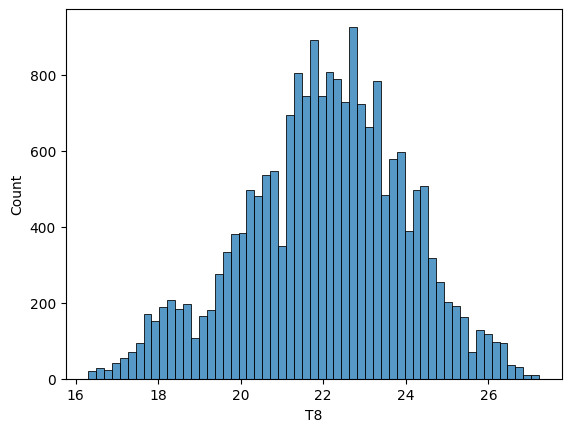

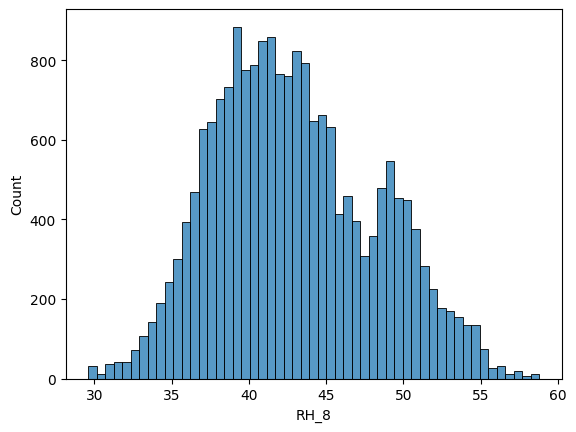

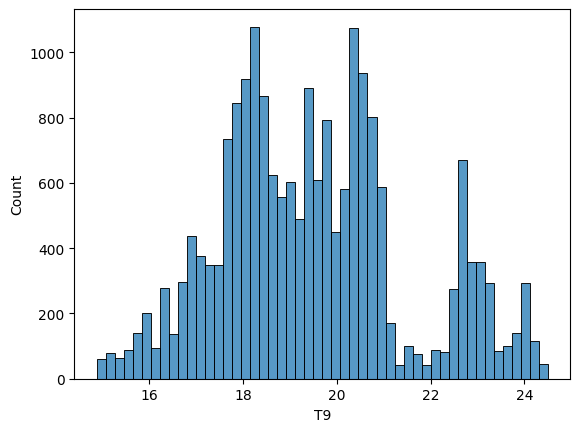

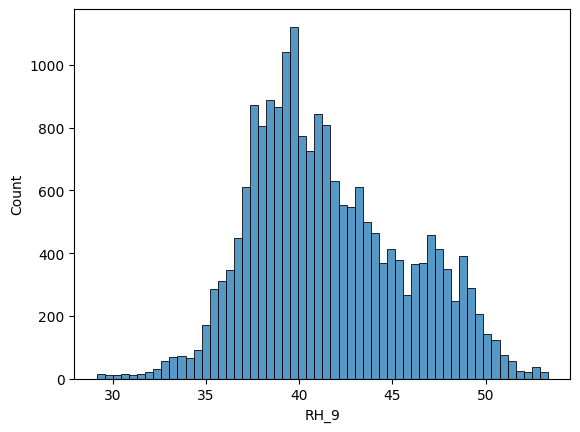

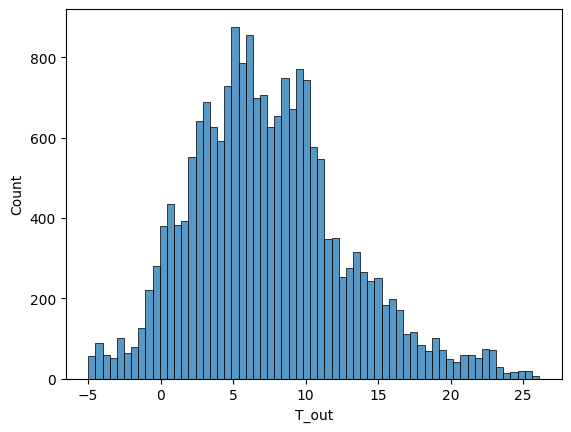

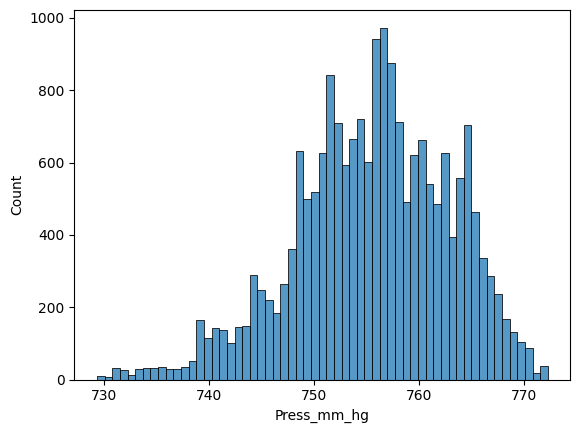

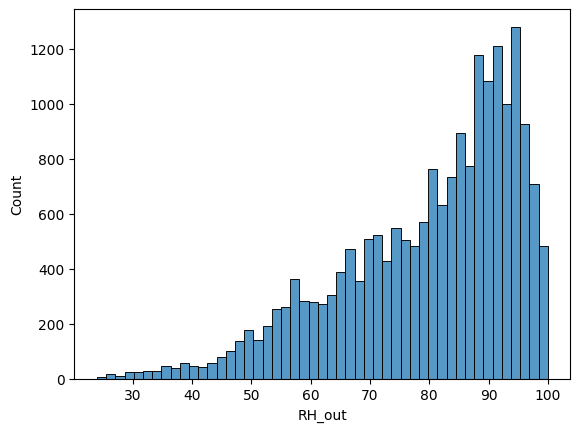

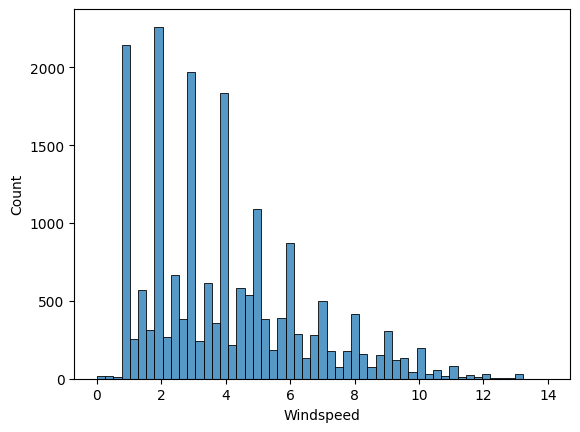

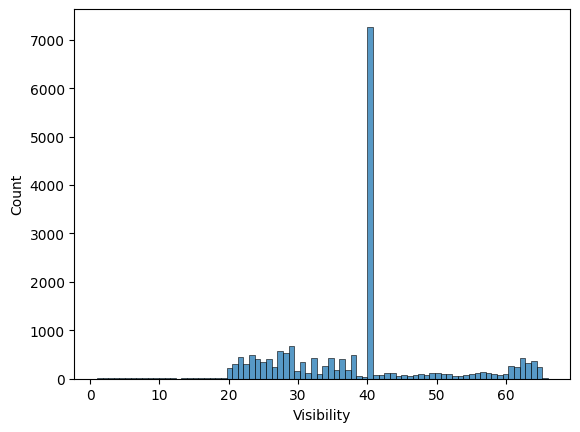

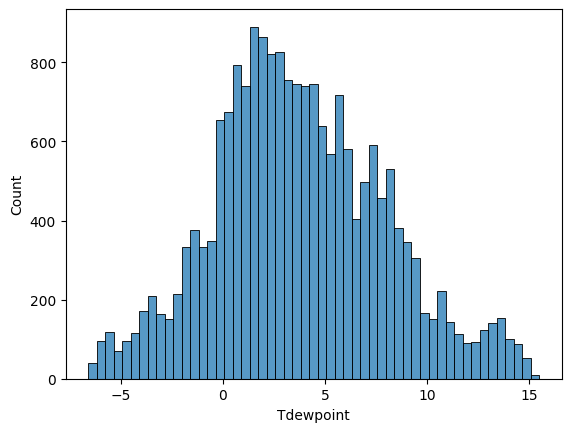

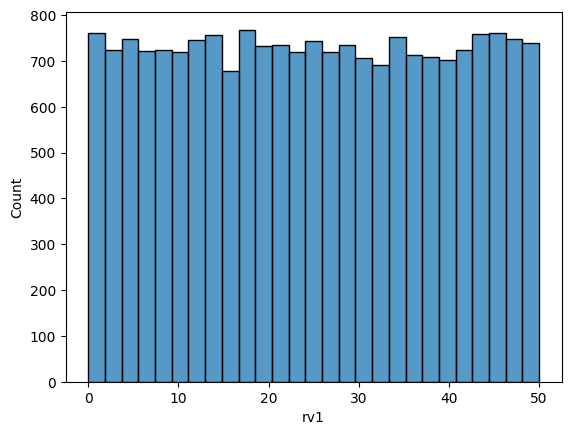

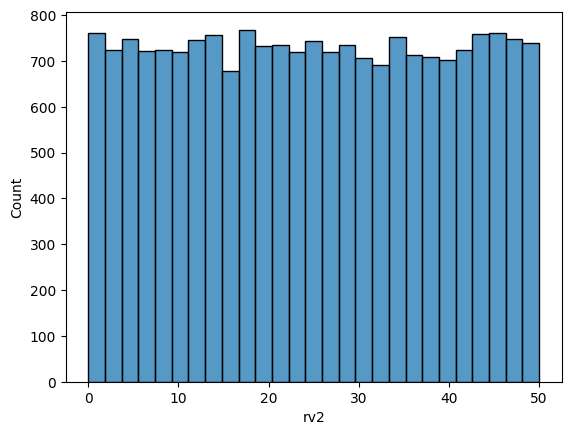

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/energydata_complete.csv')
num_columns = df.select_dtypes(include='number').columns
for column in num_columns:
    sns.histplot(data=df, x=column)
    plt.show()

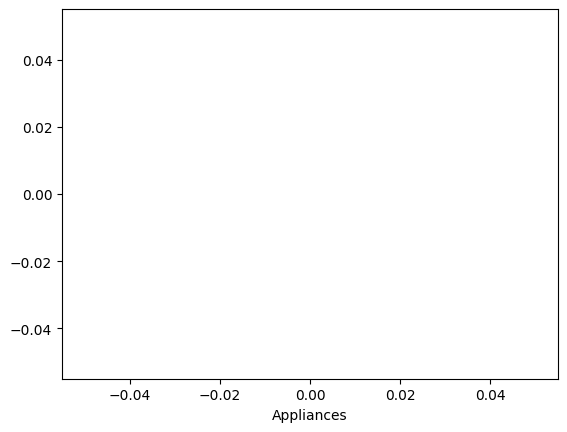

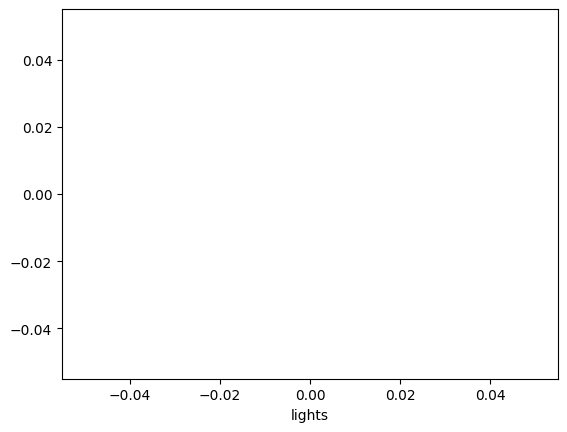

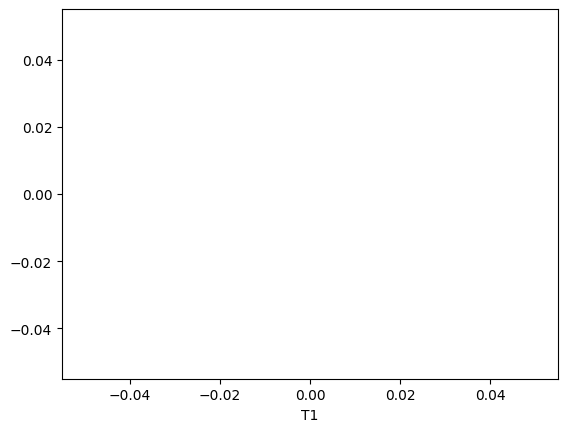

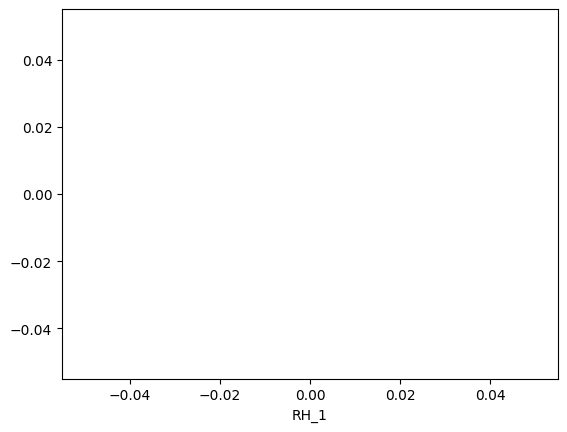

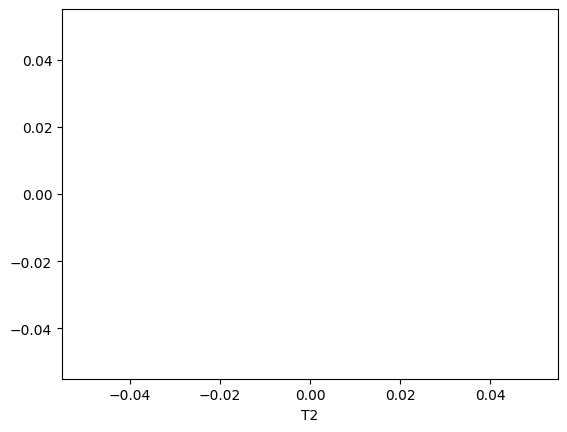

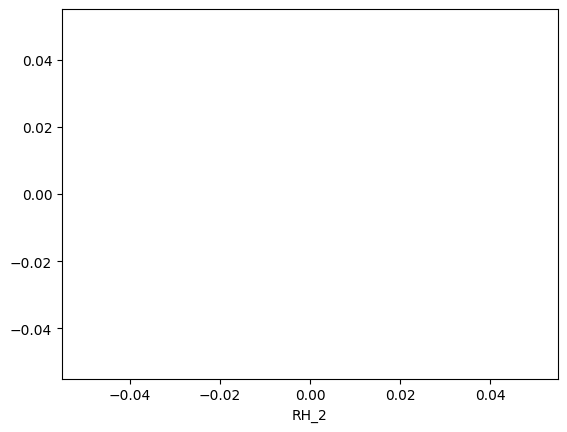

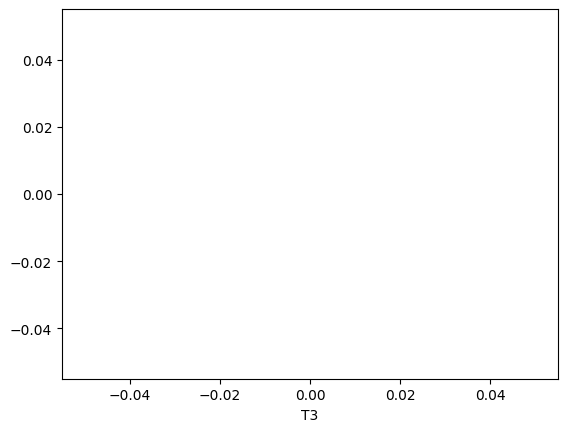

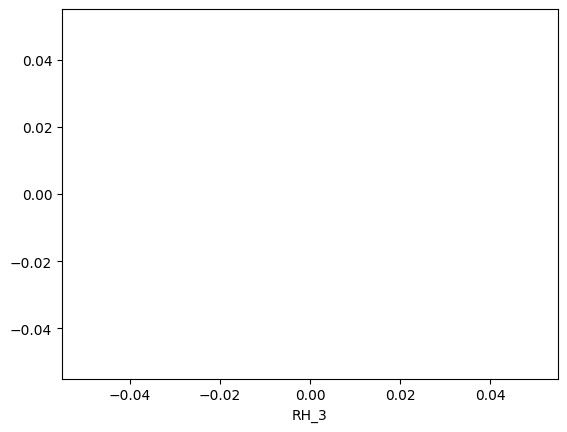

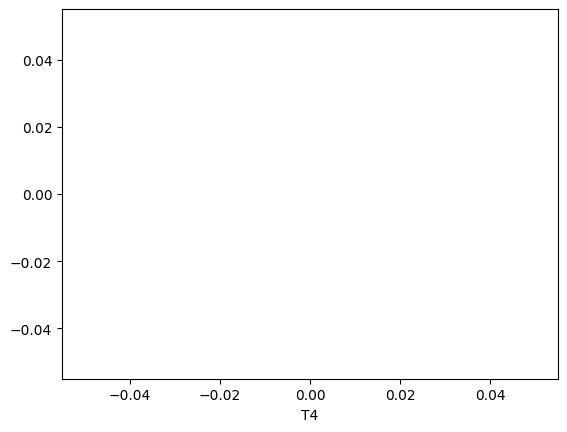

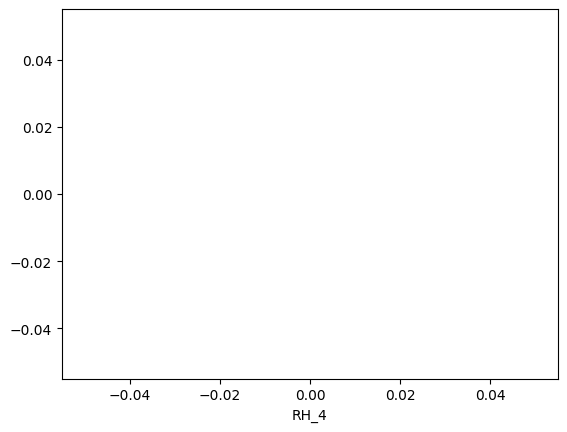

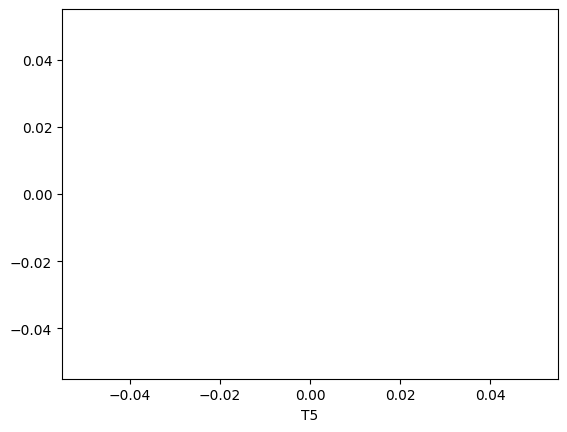

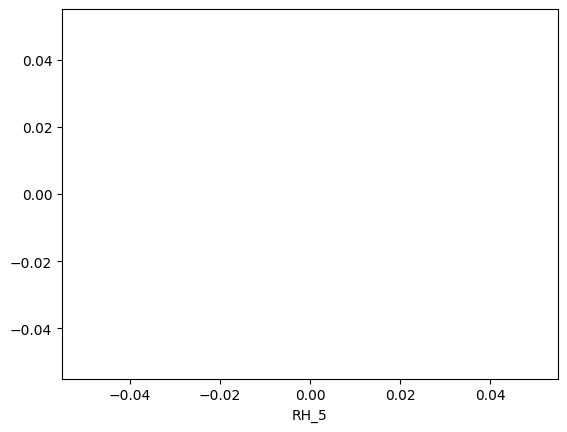

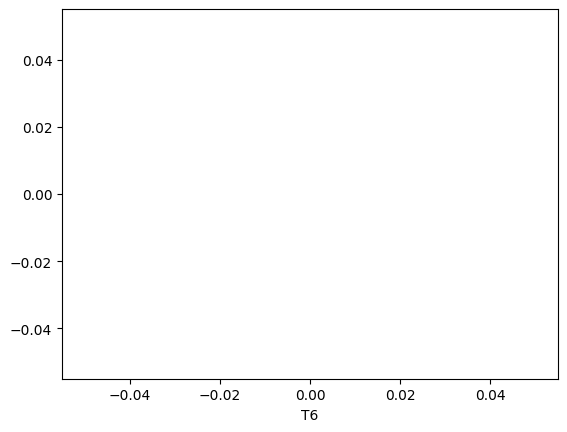

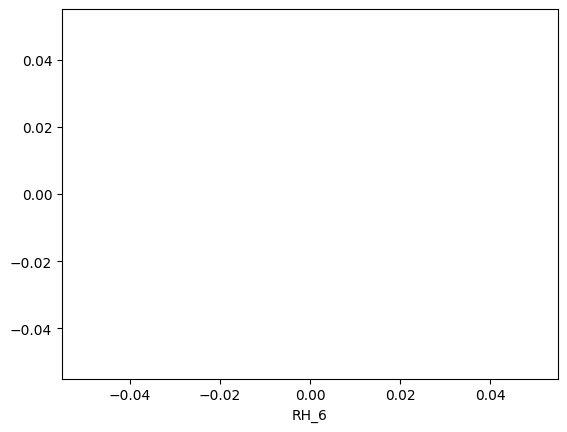

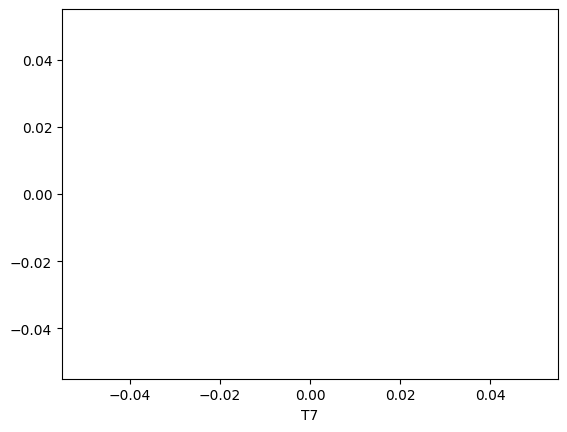

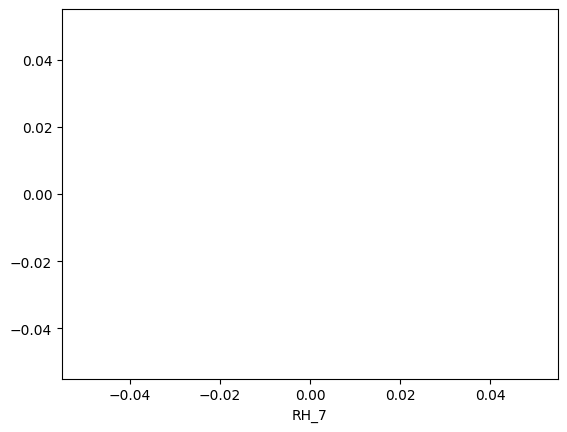

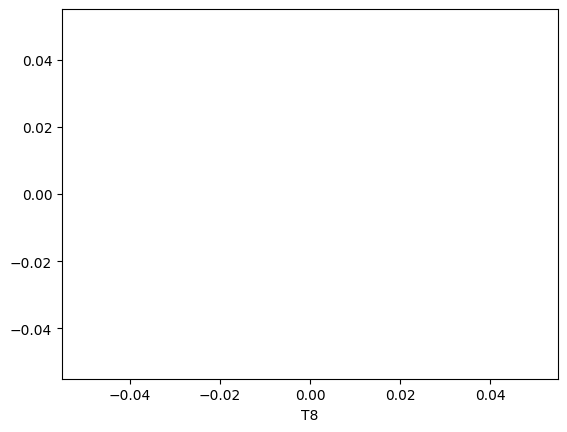

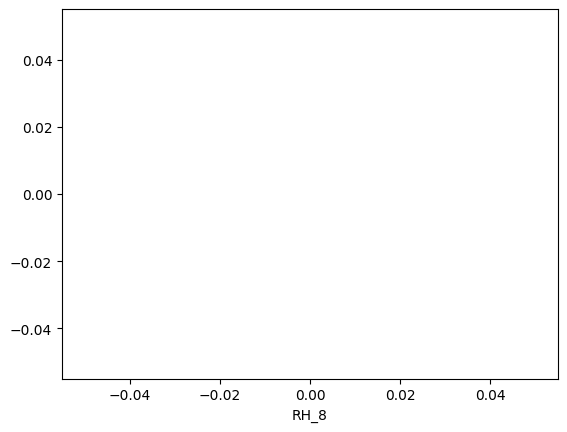

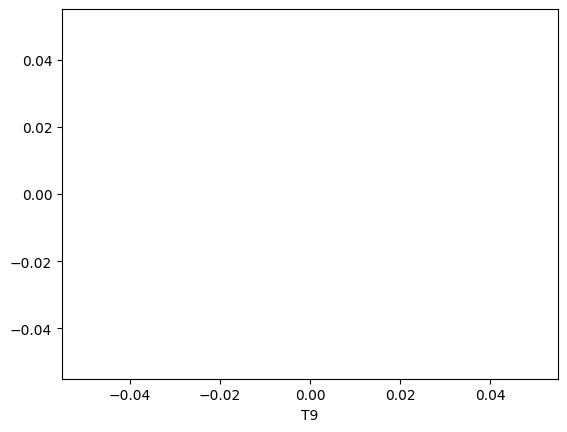

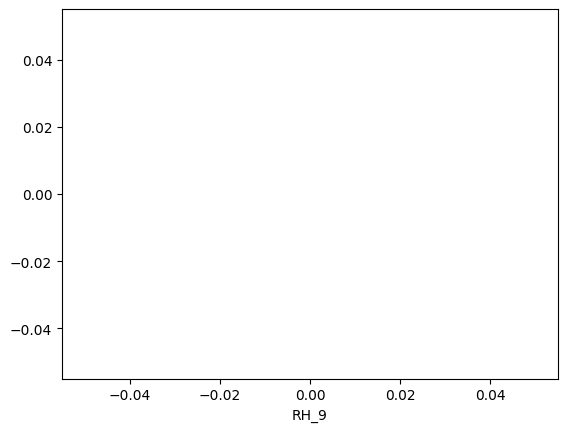

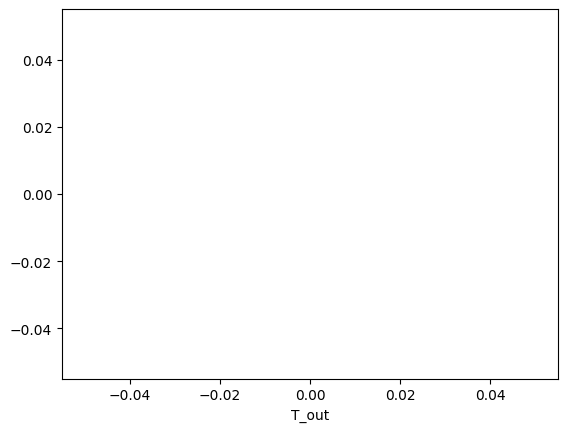

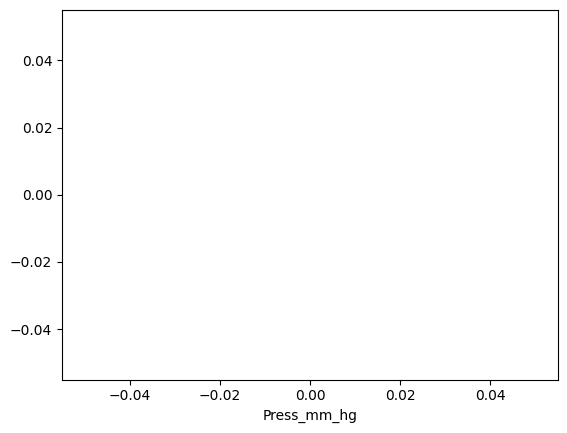

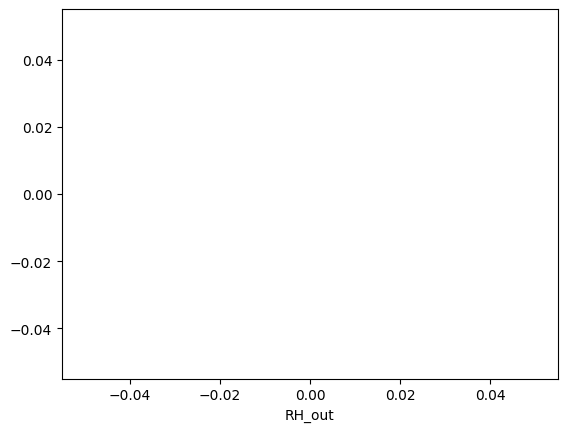

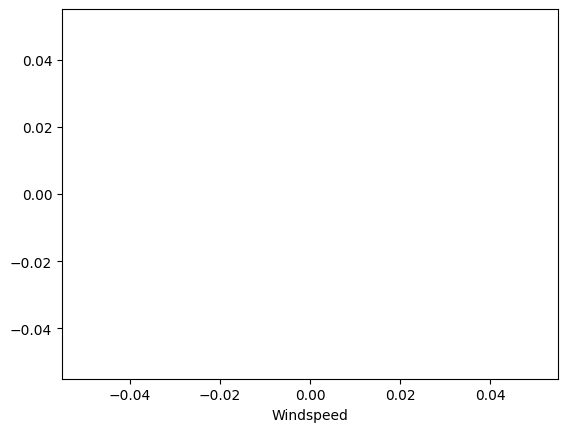

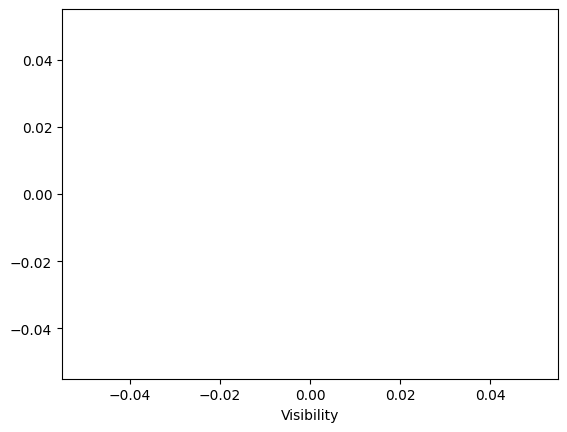

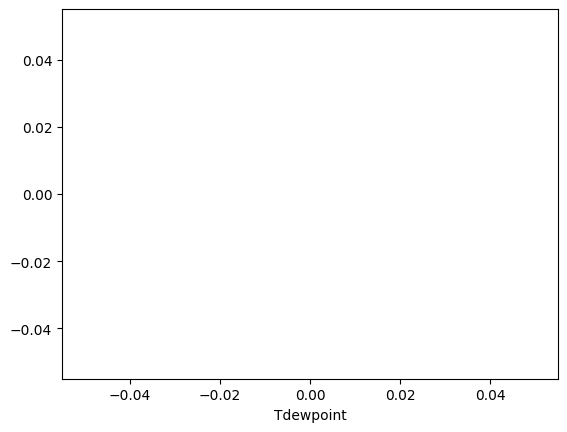

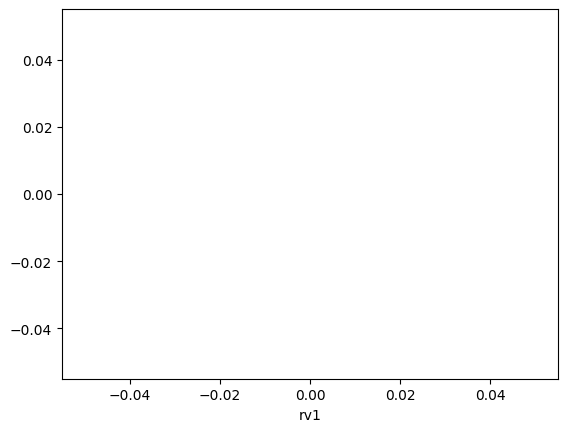

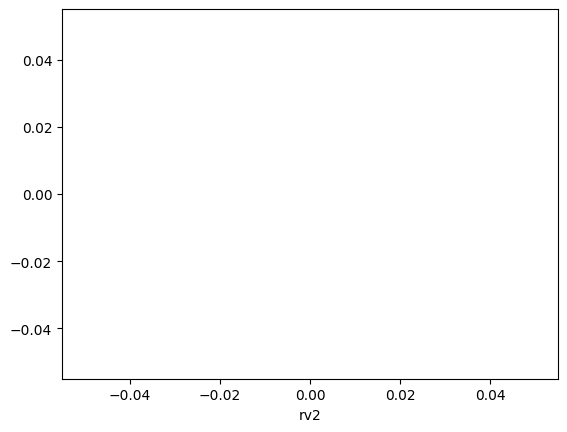

In [ ]:
for column in num_columns:
  sns.scatterplot(data=df,x=column)
  plt.show()

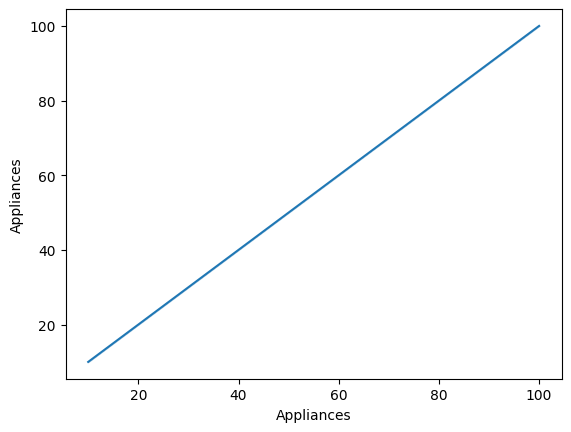

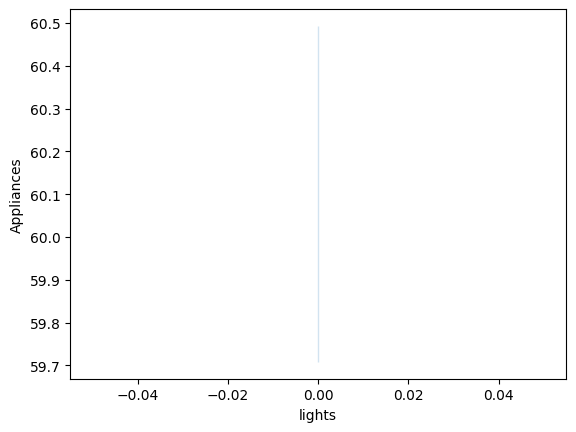

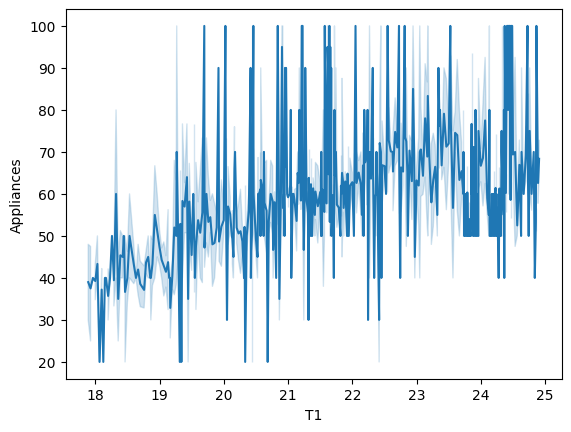

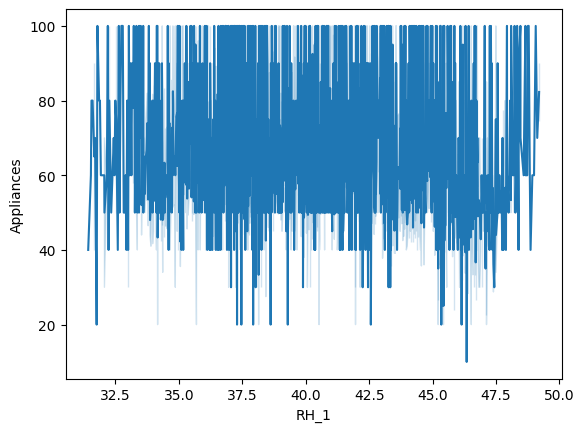

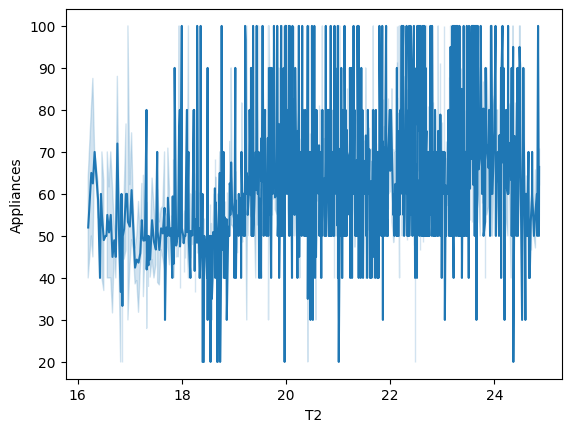

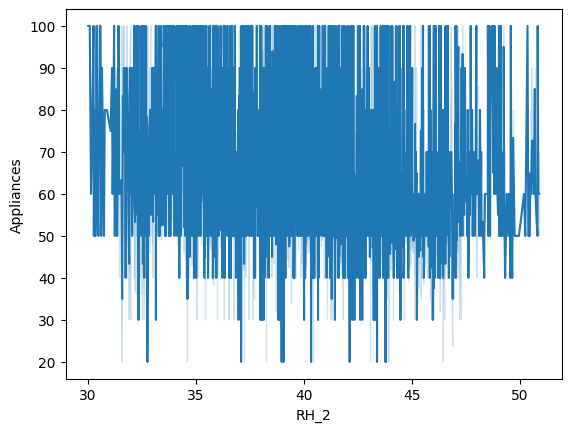

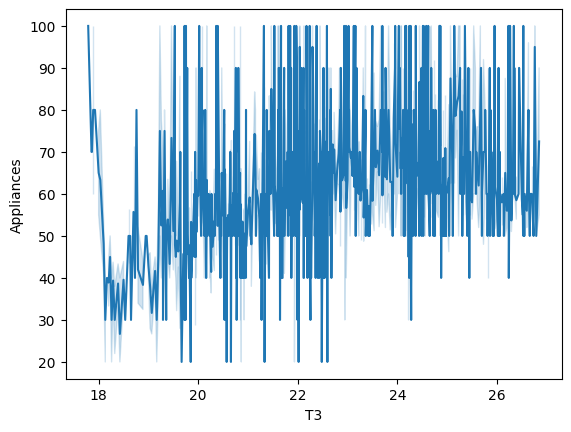

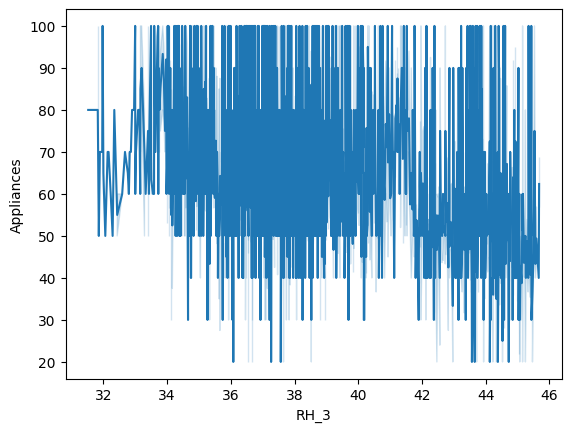

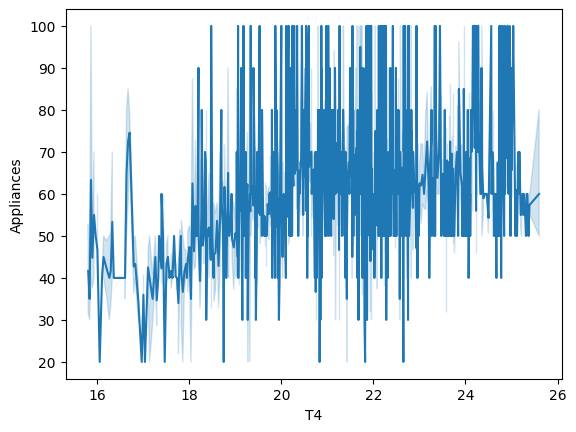

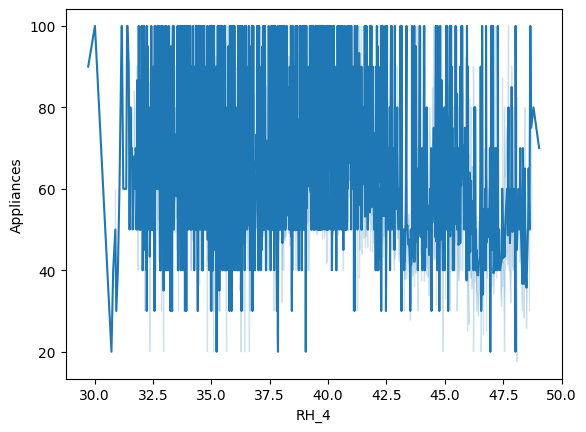

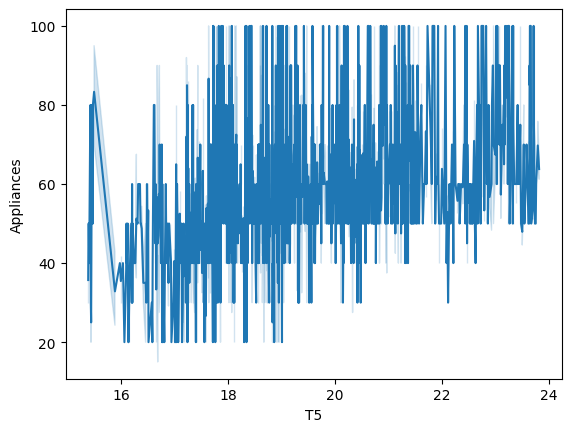

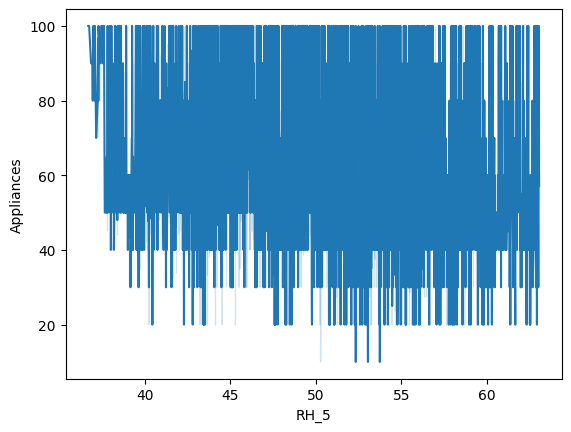

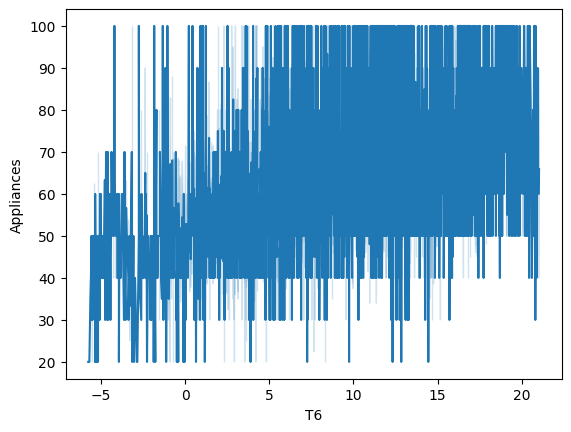

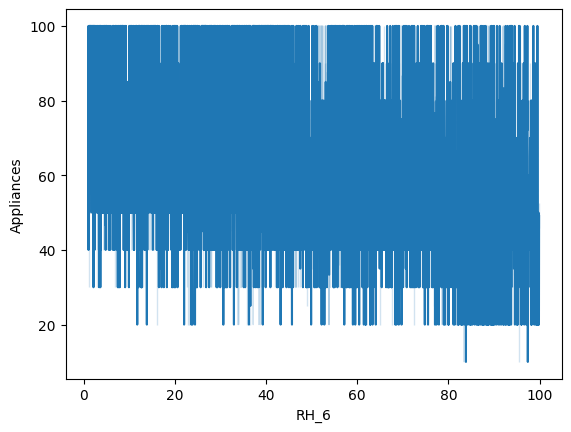

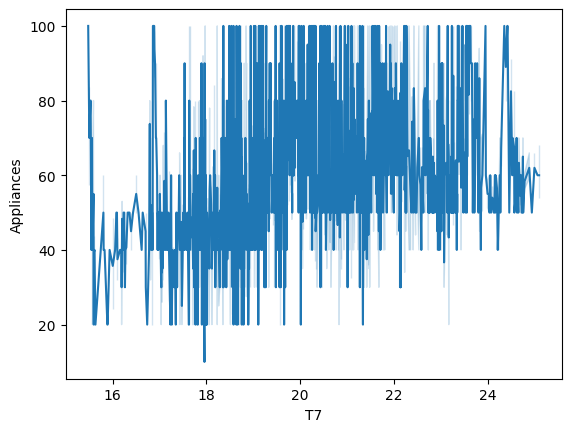

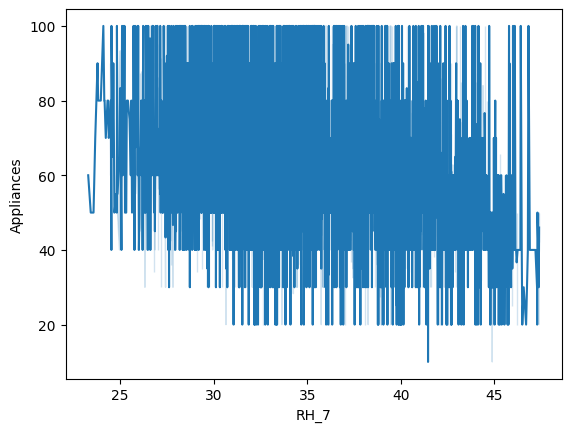

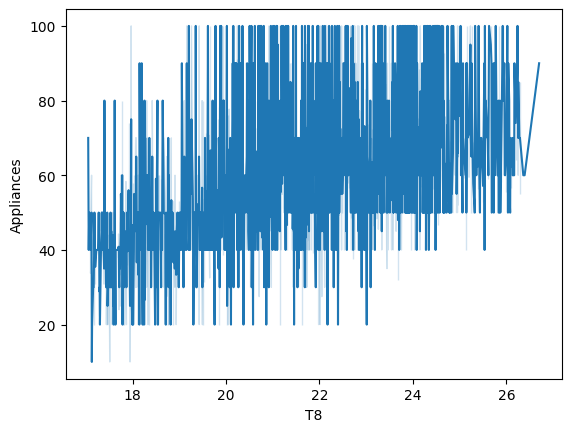

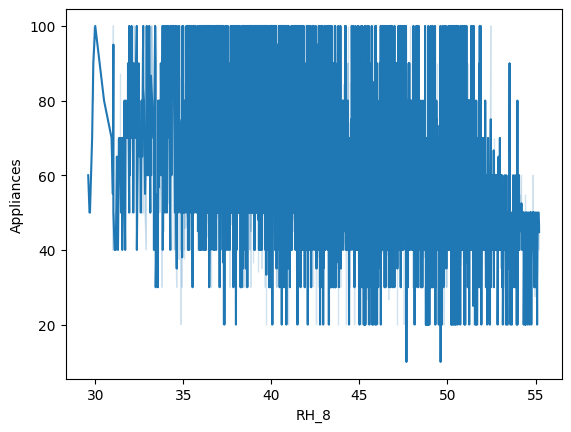

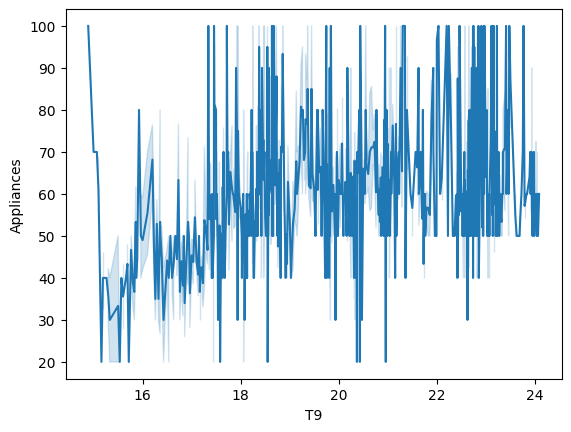

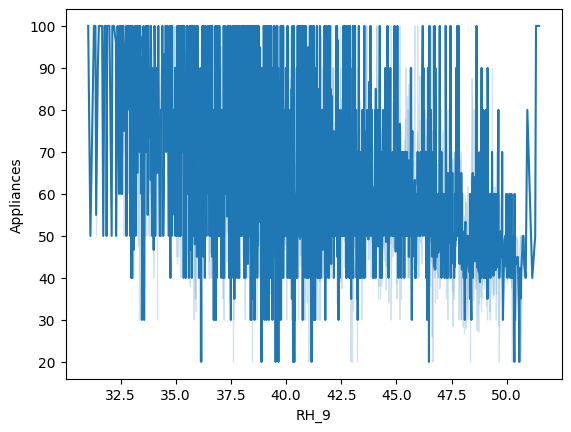

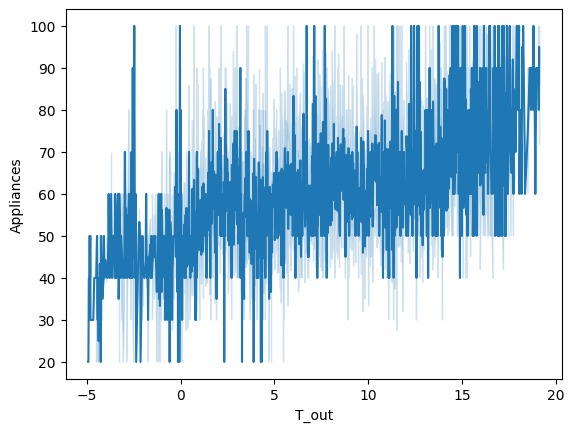

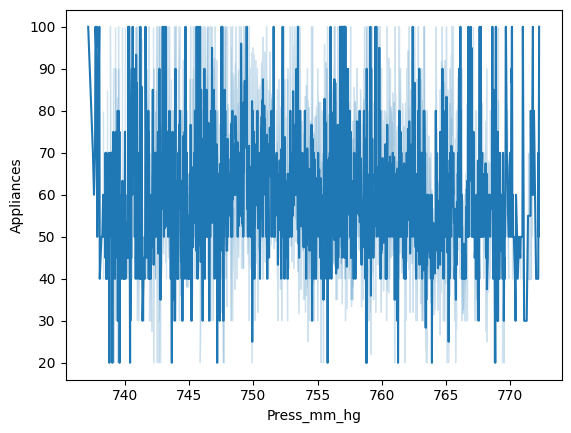

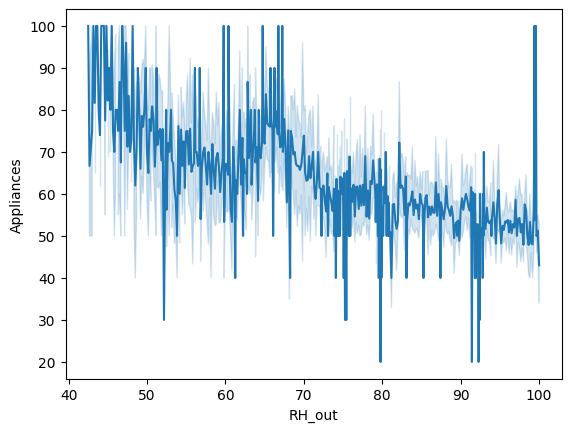

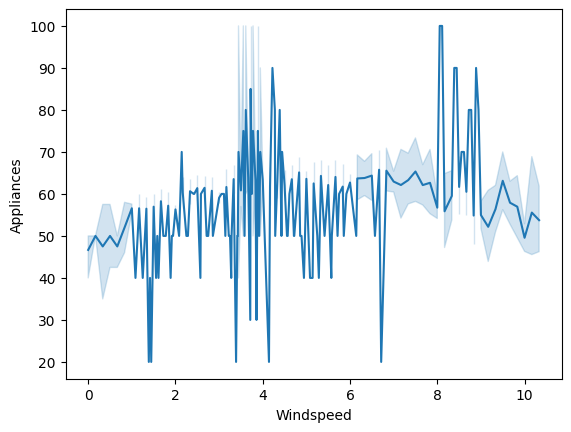

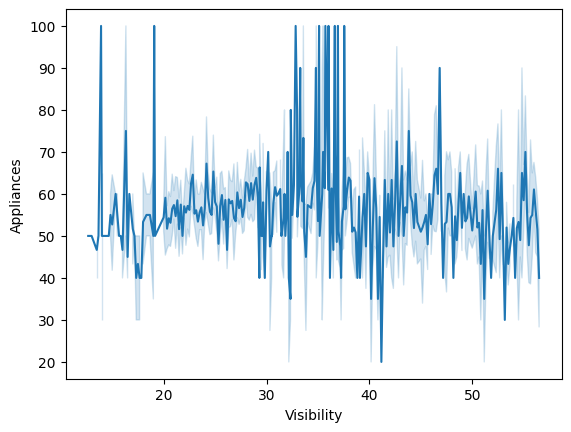

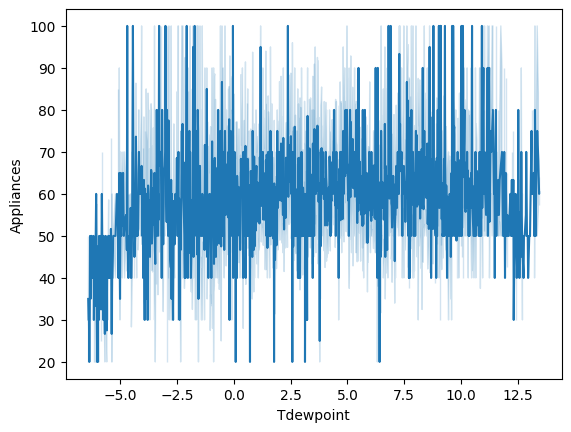

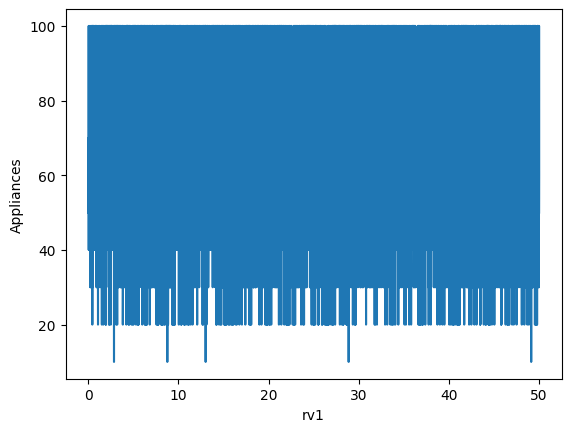

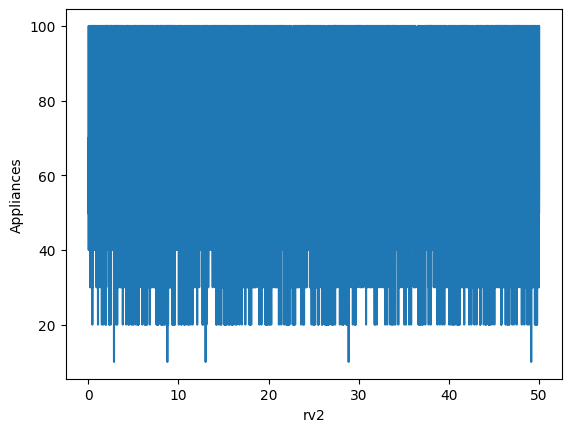

In [ ]:
for column in num_columns:
  sns.lineplot(data=df, x=column, y=df[num_columns[0]])
  plt.show()

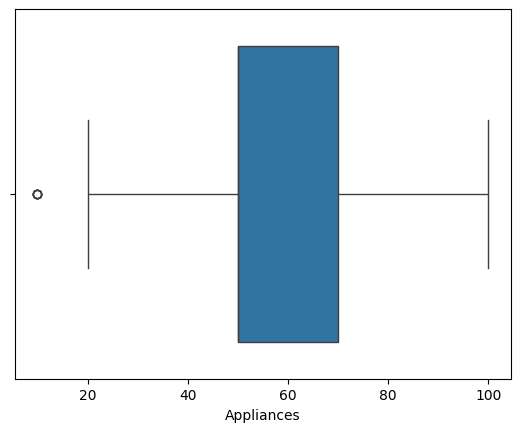

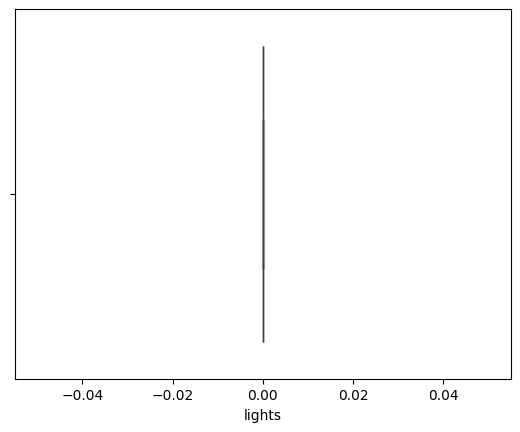

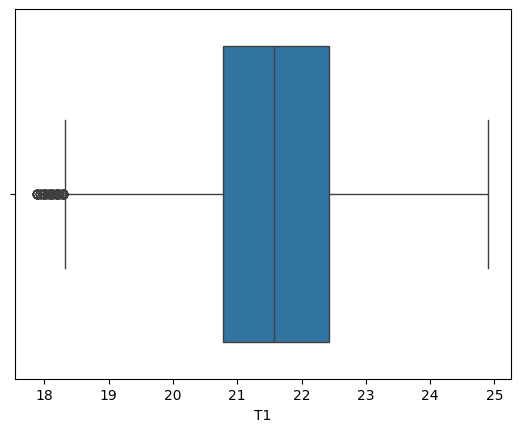

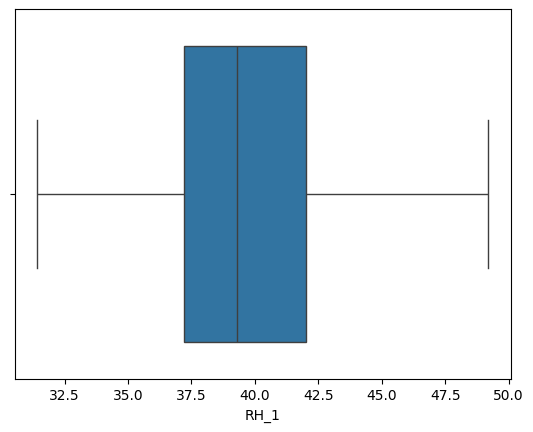

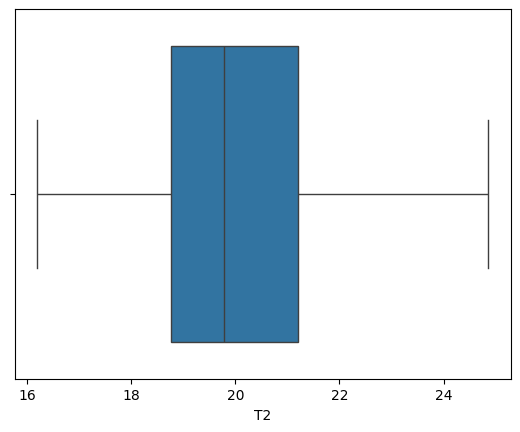

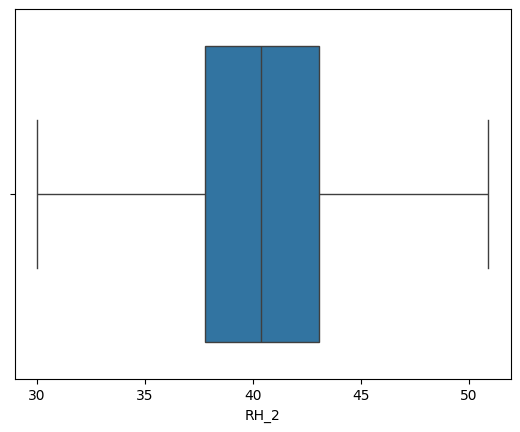

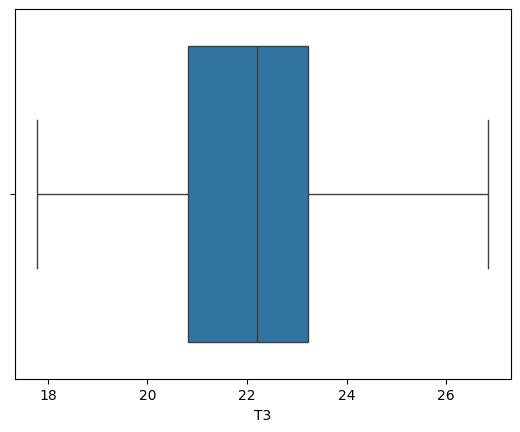

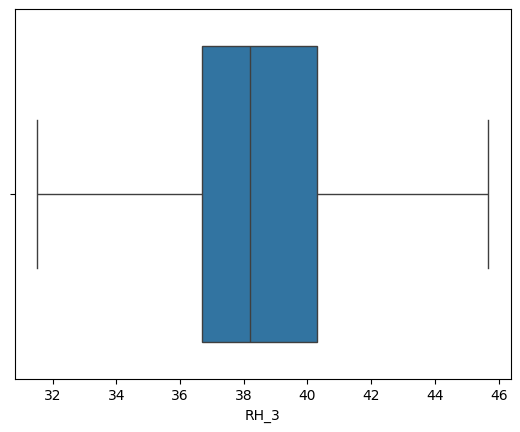

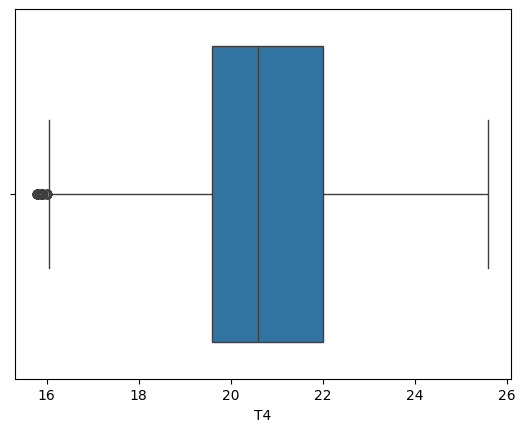

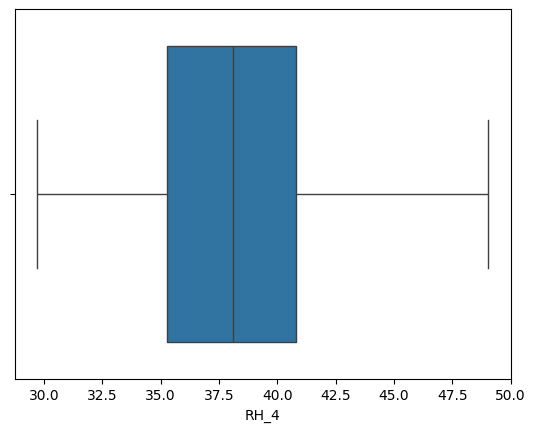

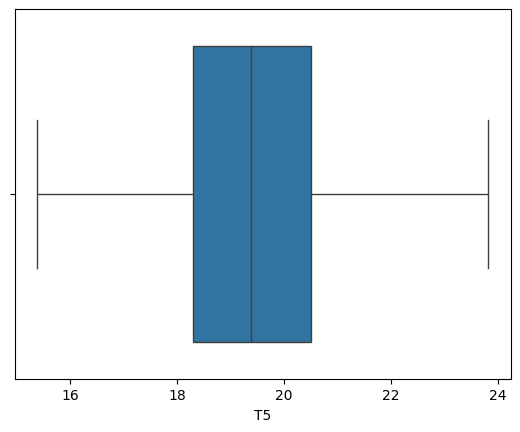

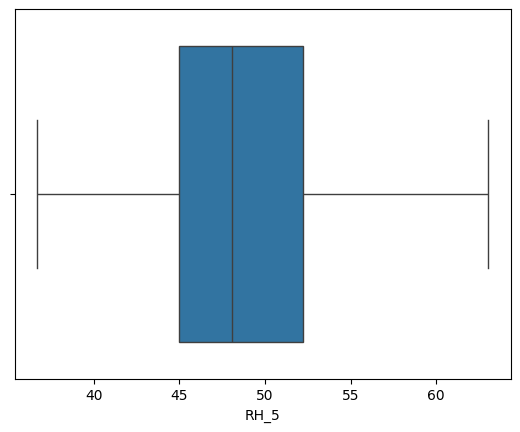

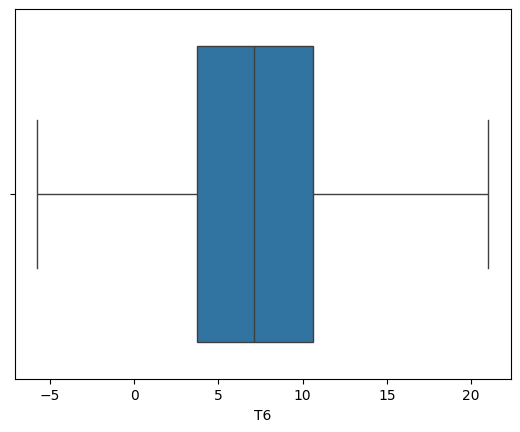

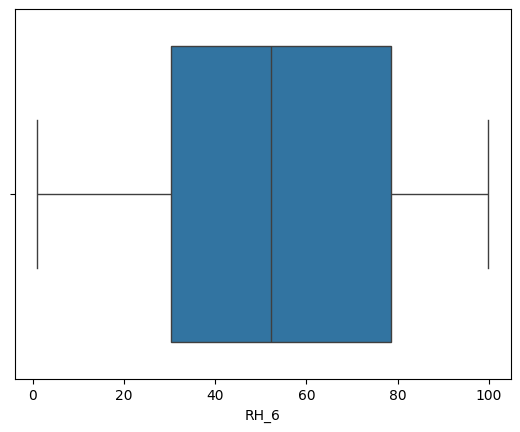

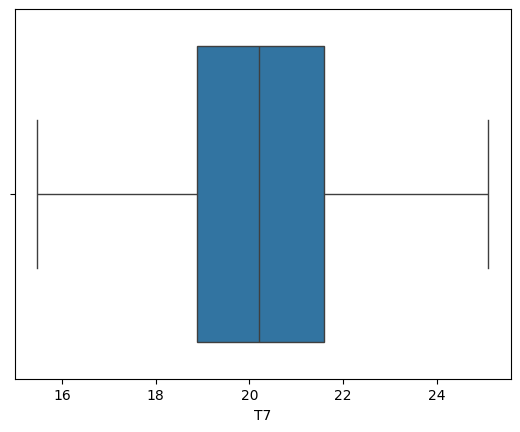

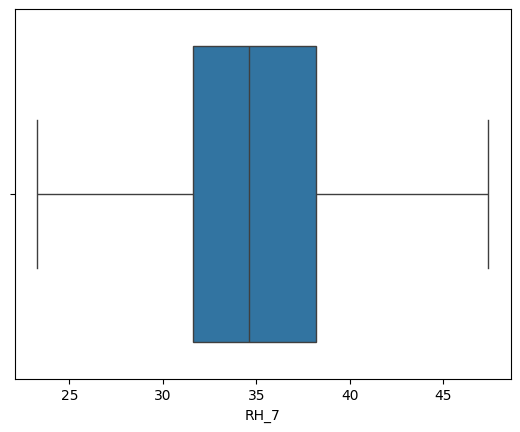

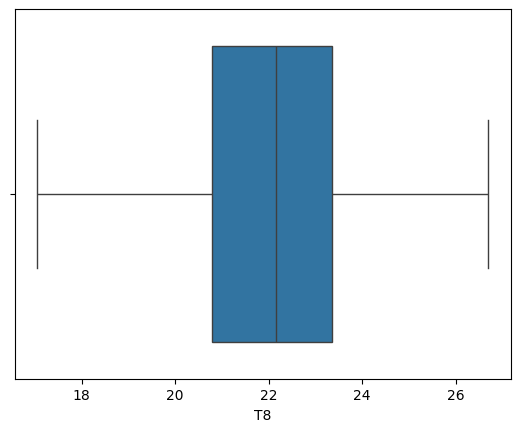

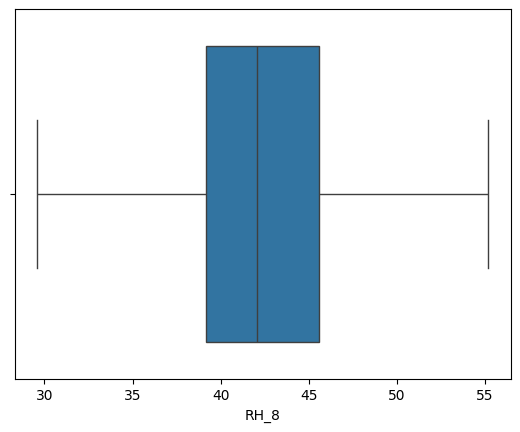

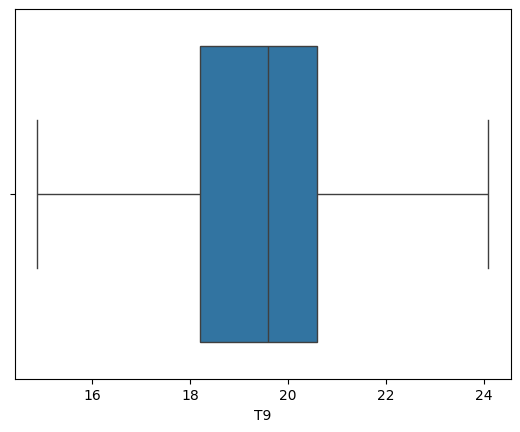

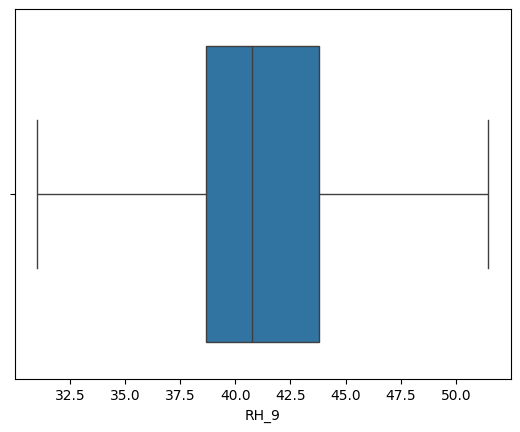

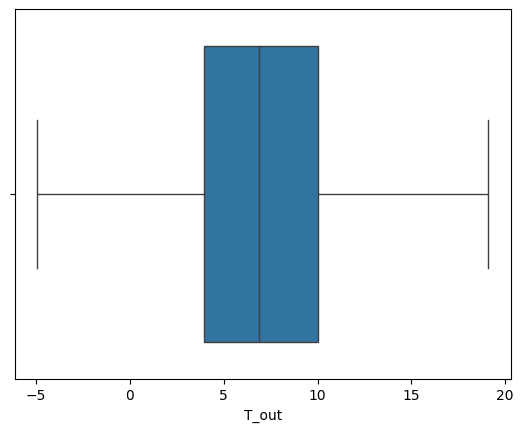

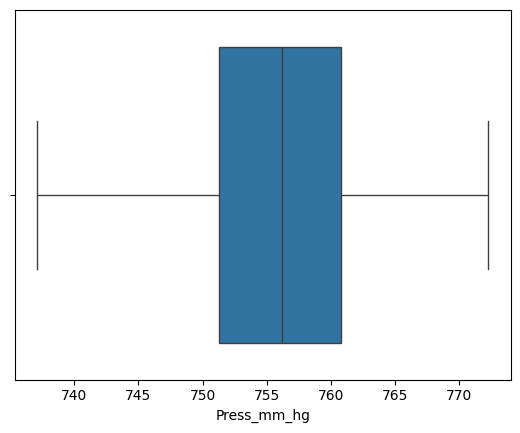

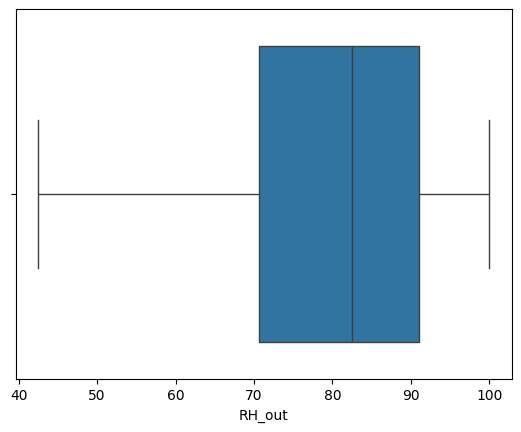

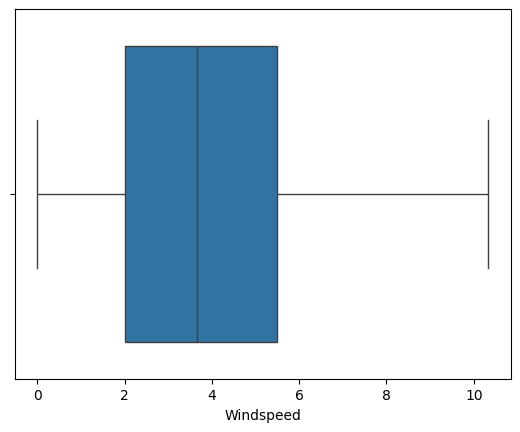

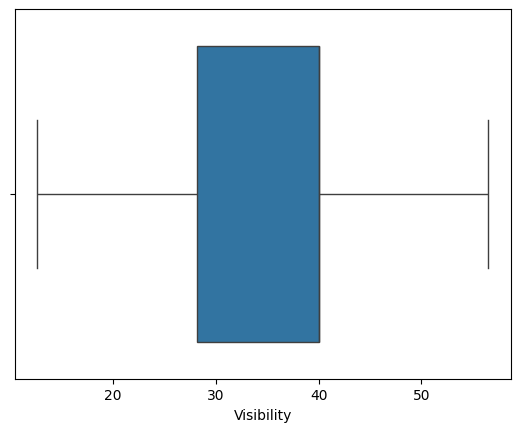

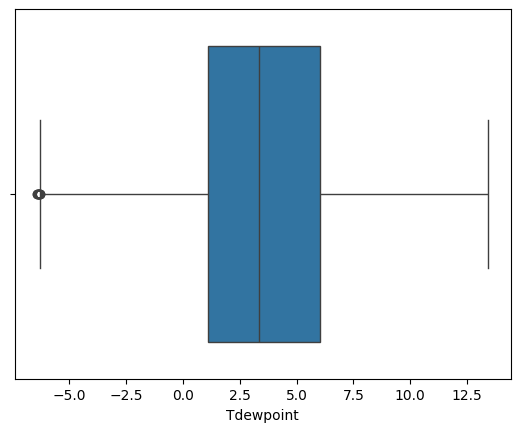

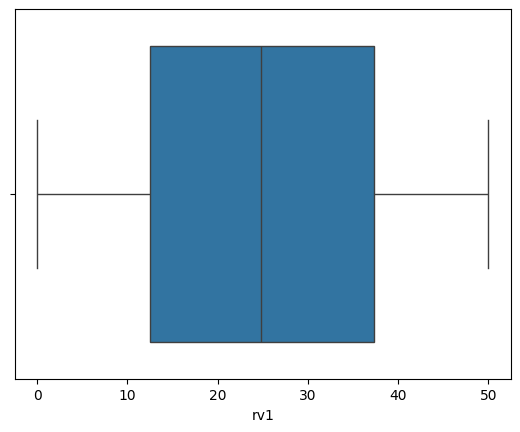

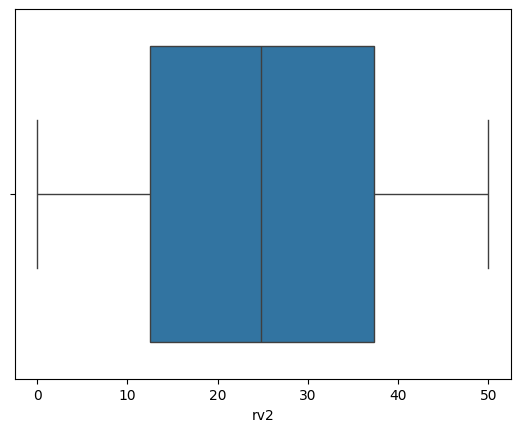

In [ ]:
for column in num_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

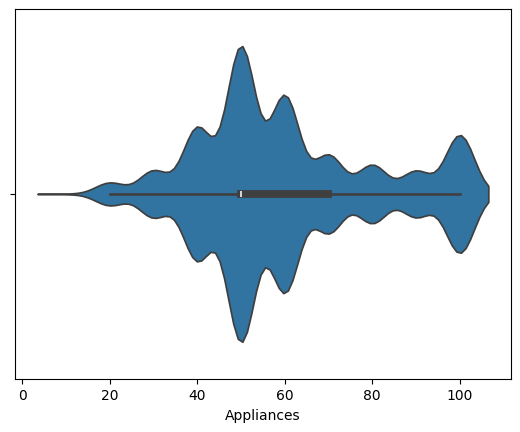

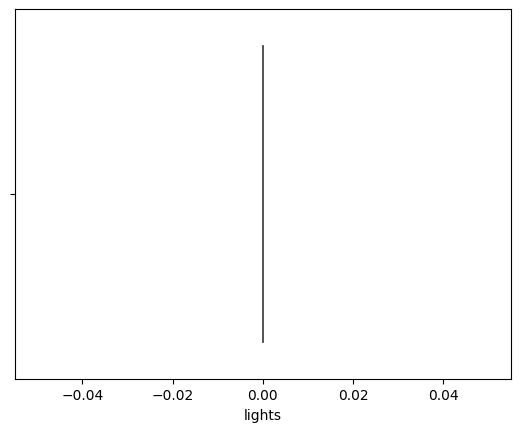

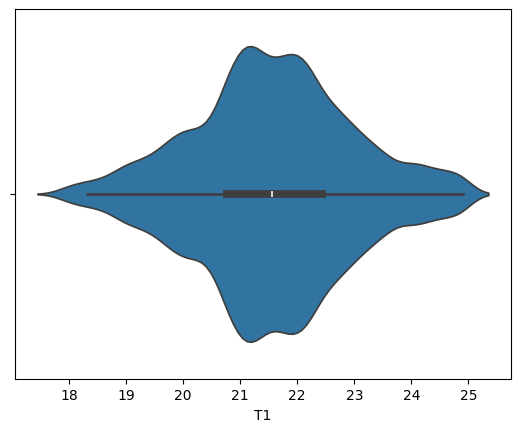

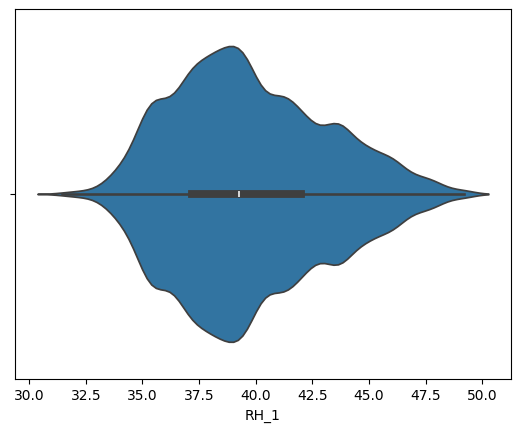

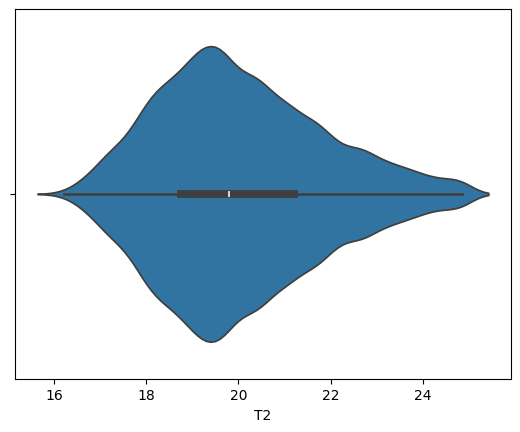

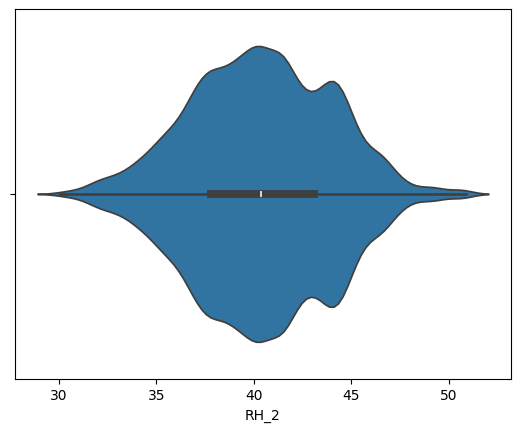

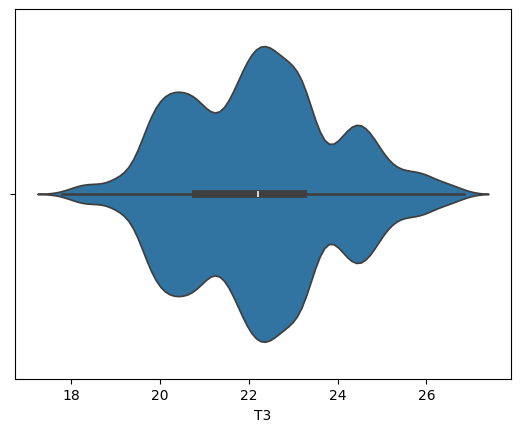

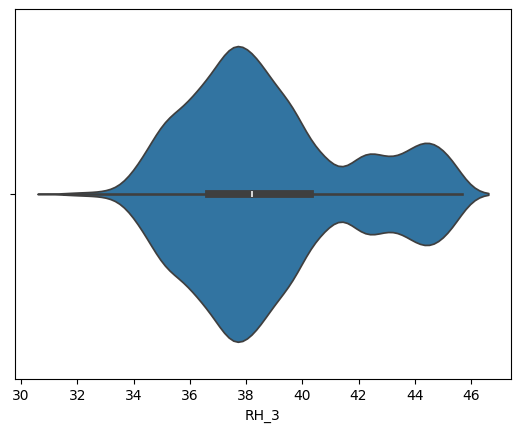

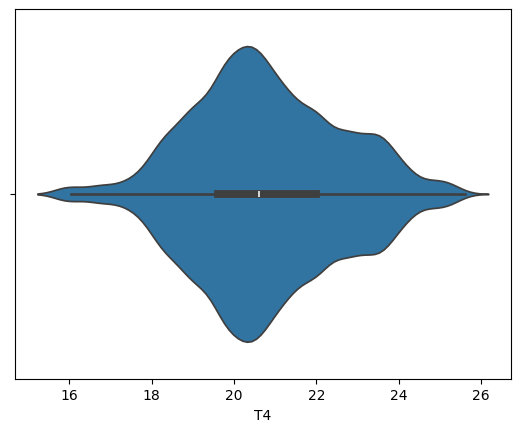

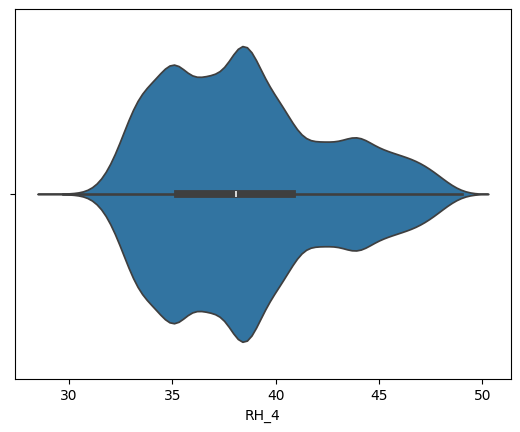

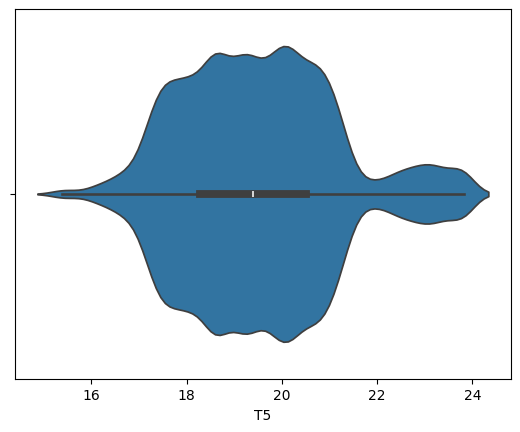

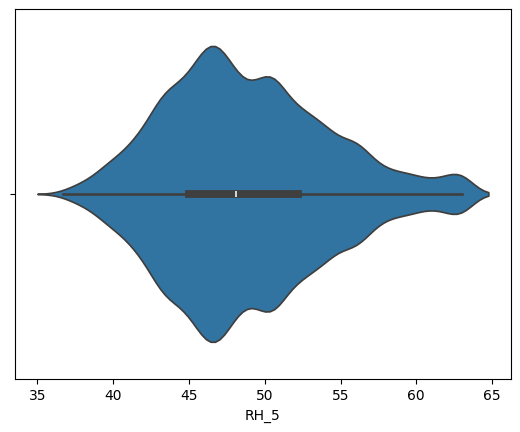

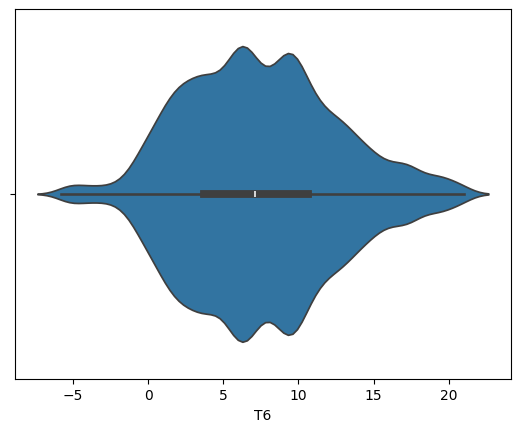

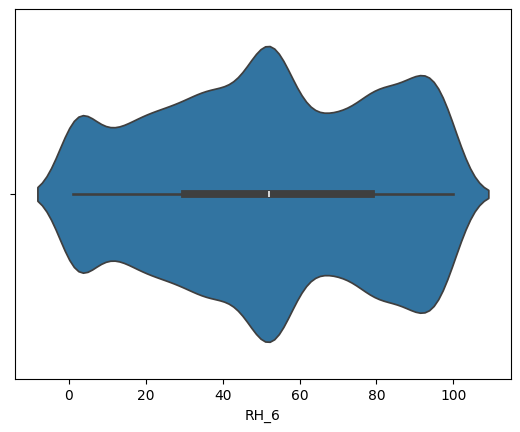

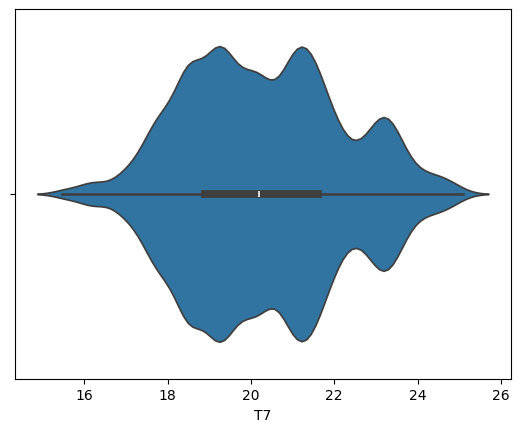

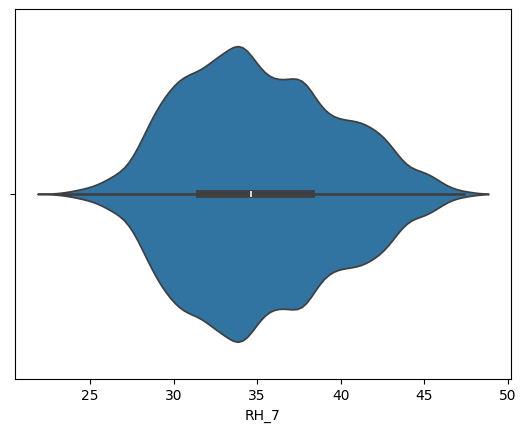

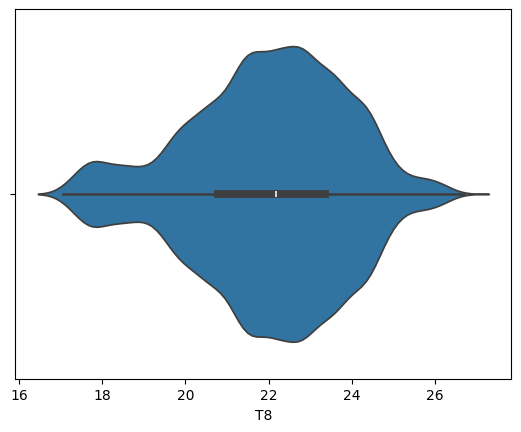

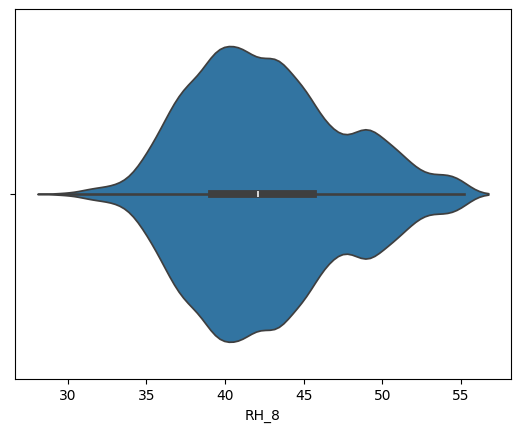

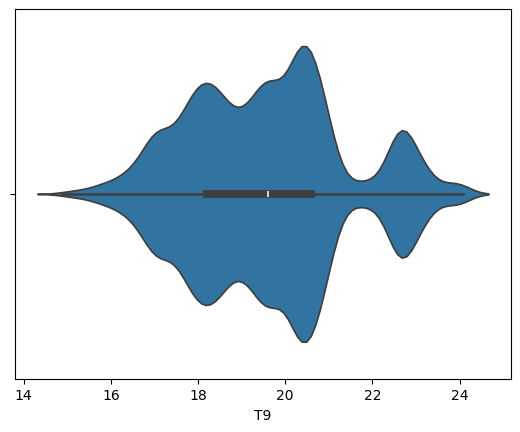

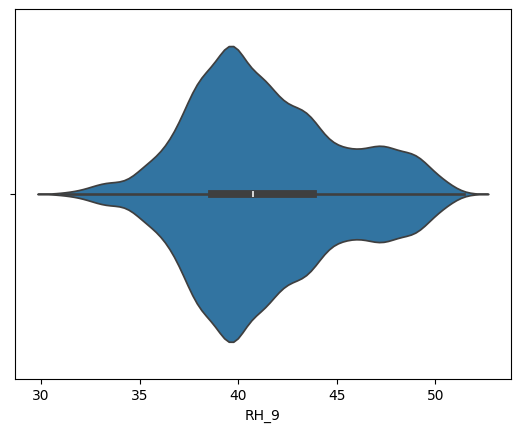

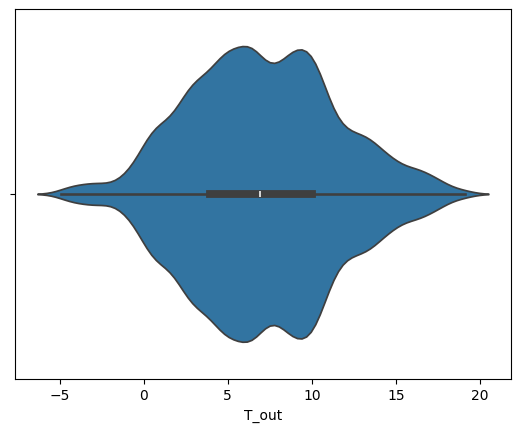

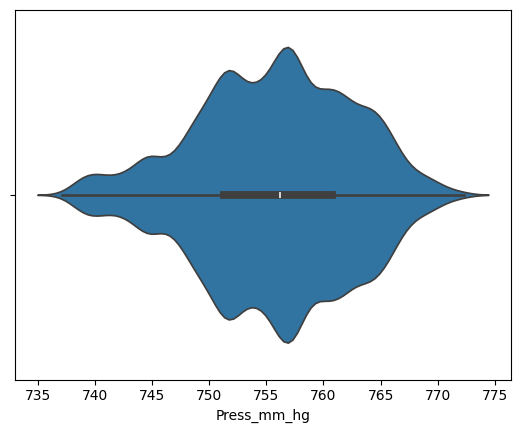

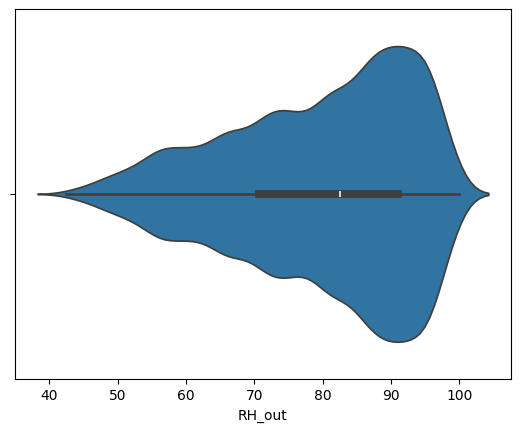

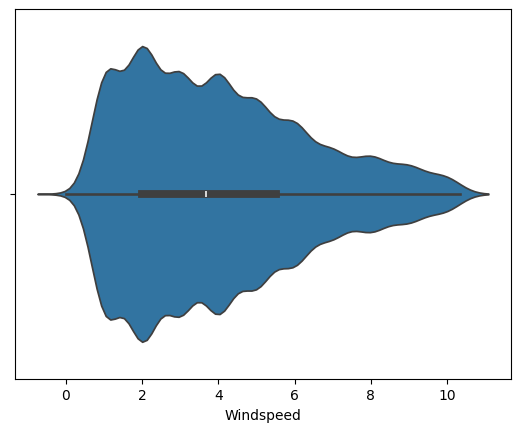

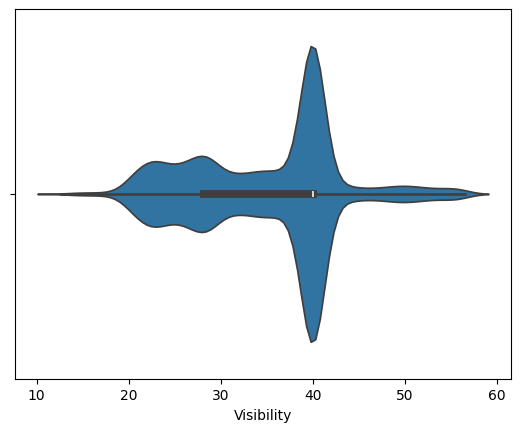

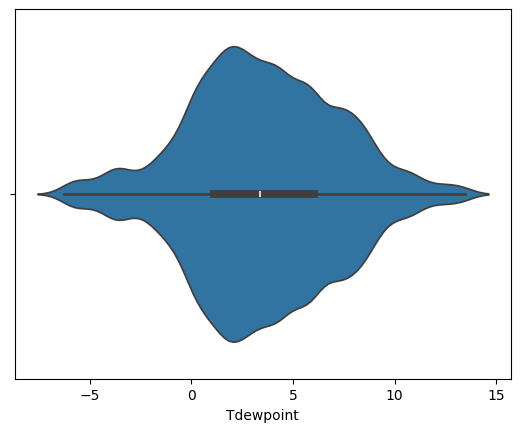

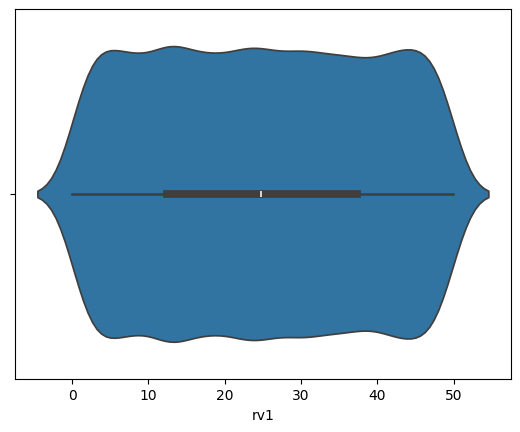

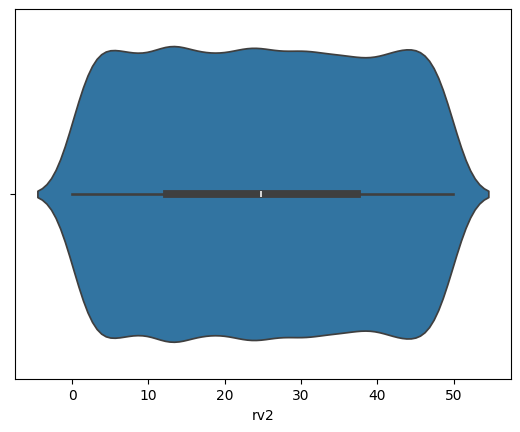

In [ ]:
for column in num_columns:
  sns.violinplot(data=df,x=column)
  plt.show()

<Axes: xlabel='date'>

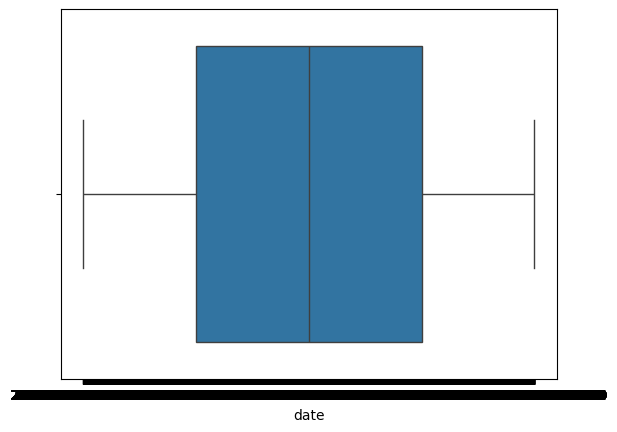

In [ ]:
sns.boxplot(data=df,x='date')

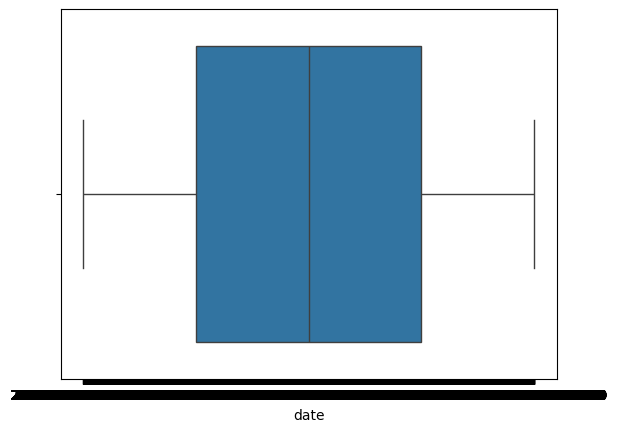

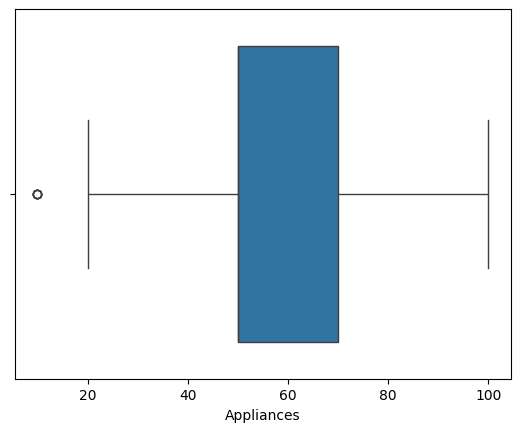

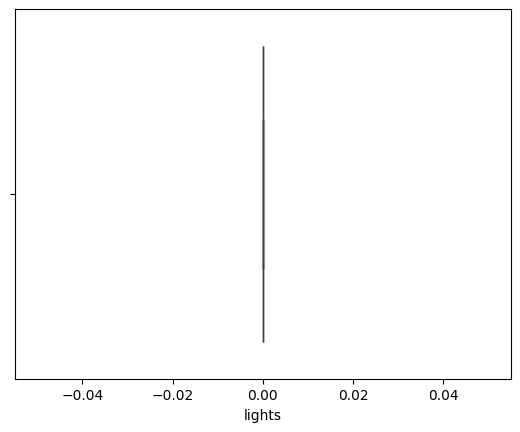

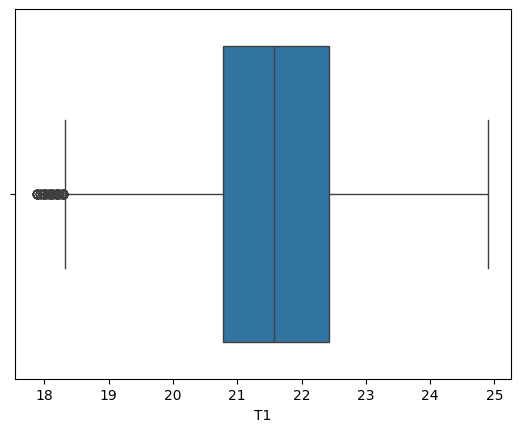

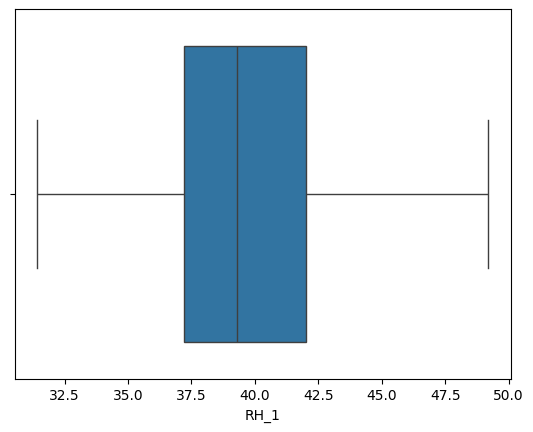

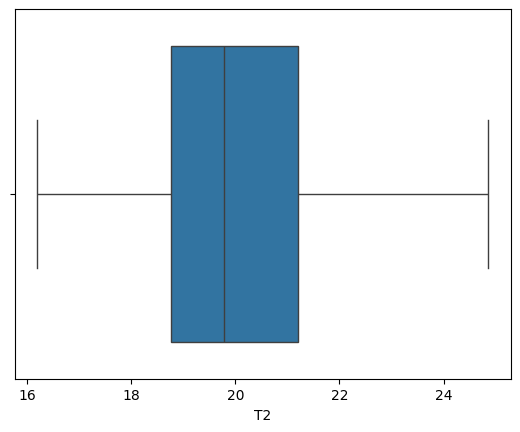

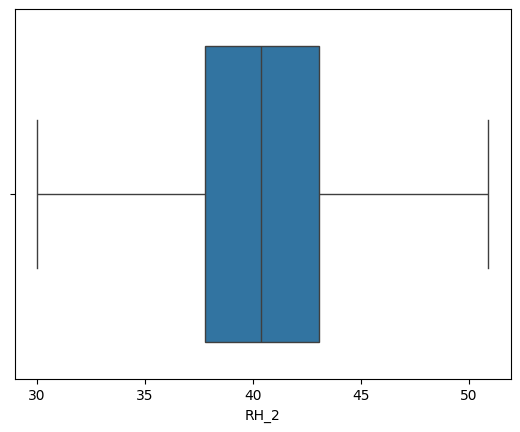

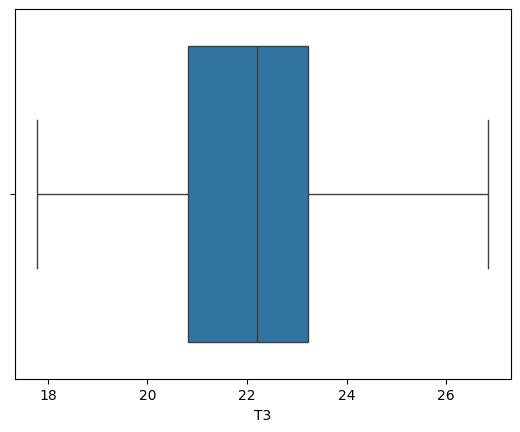

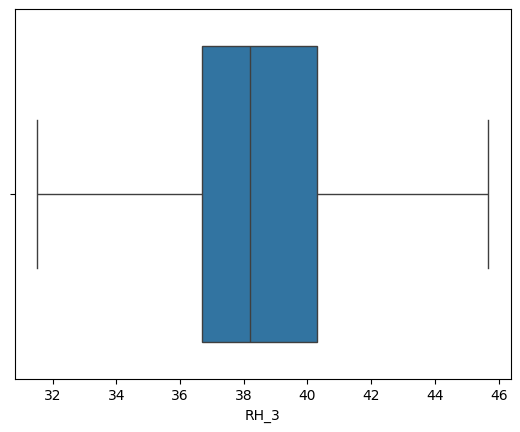

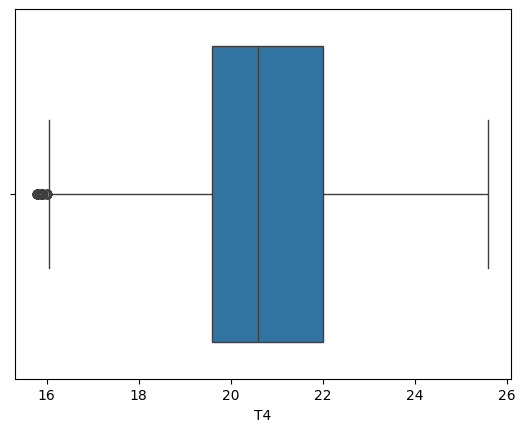

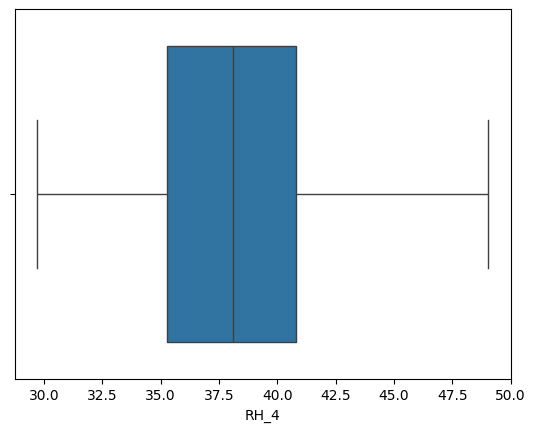

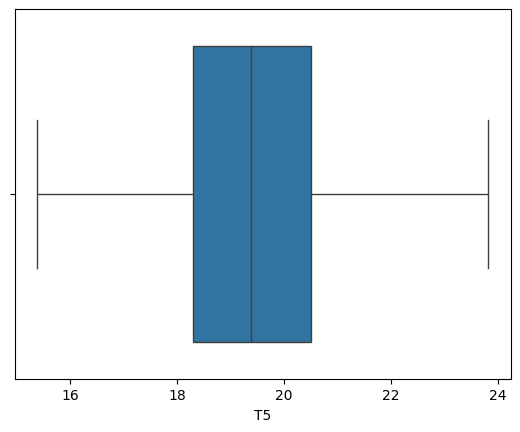

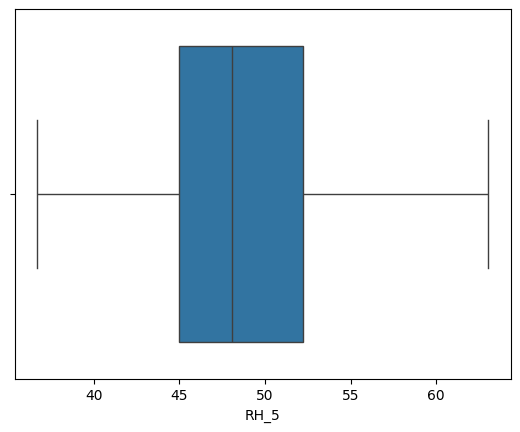

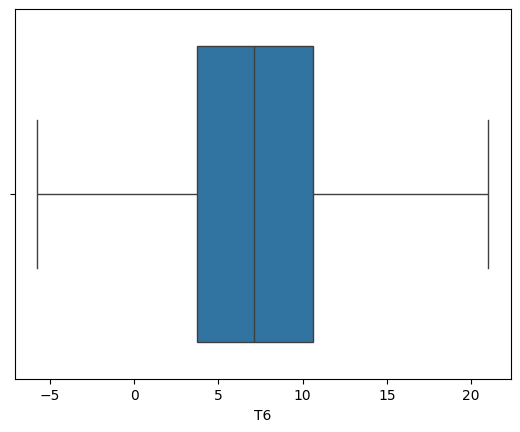

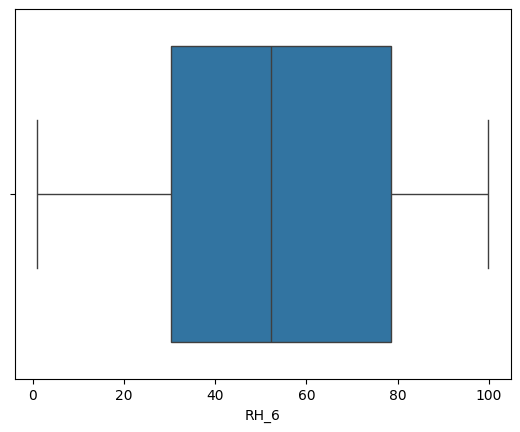

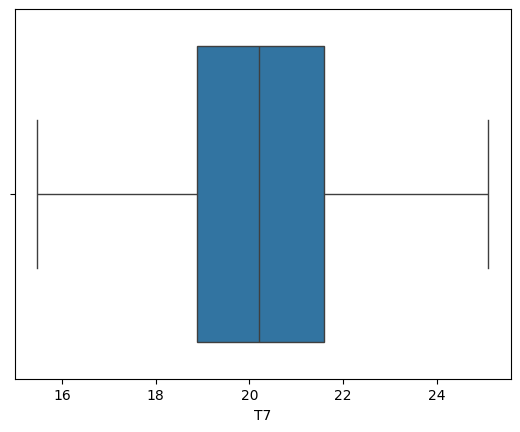

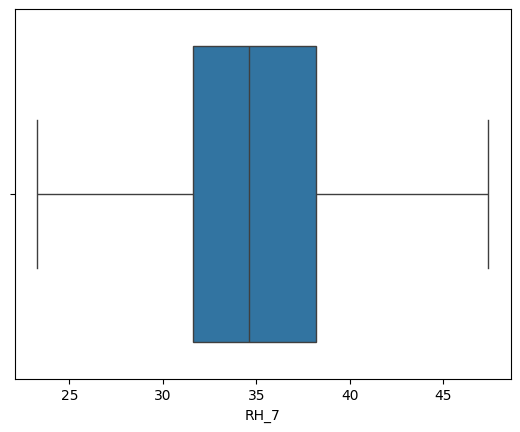

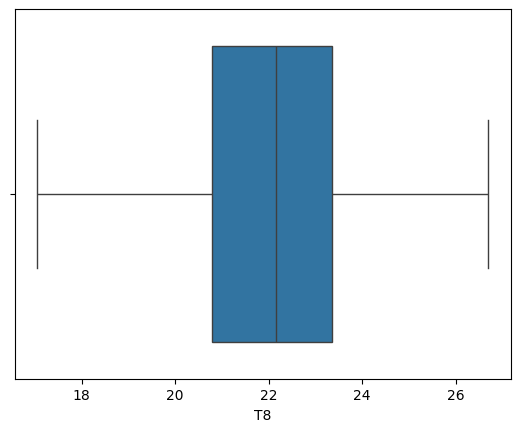

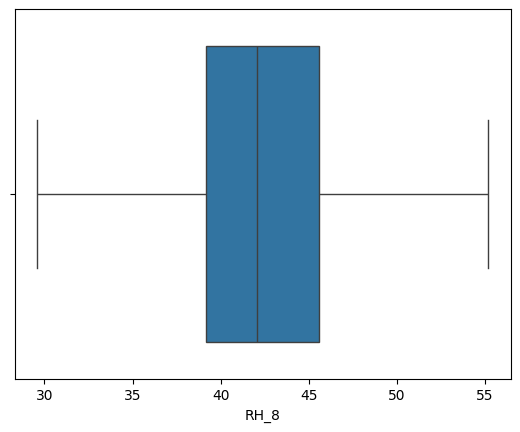

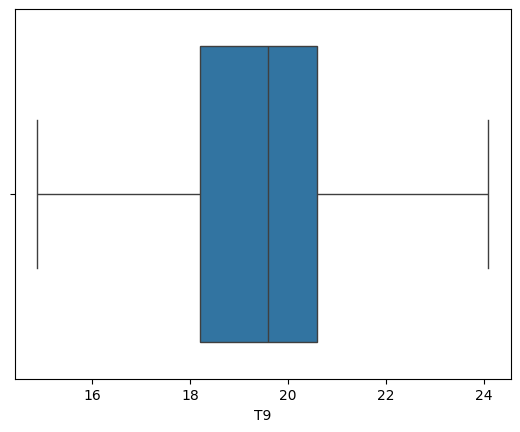

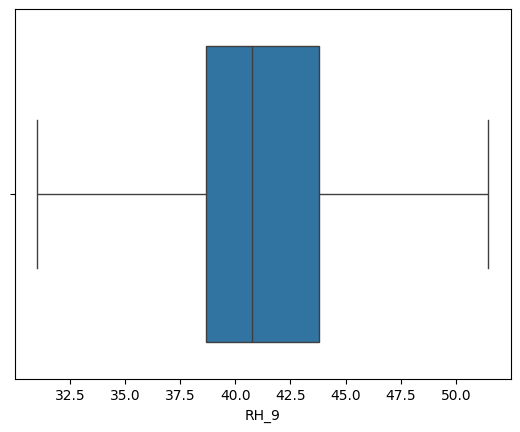

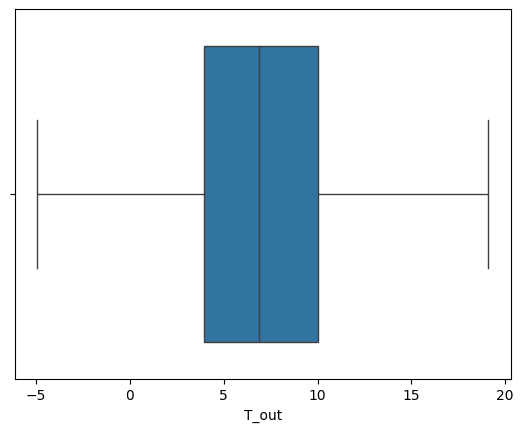

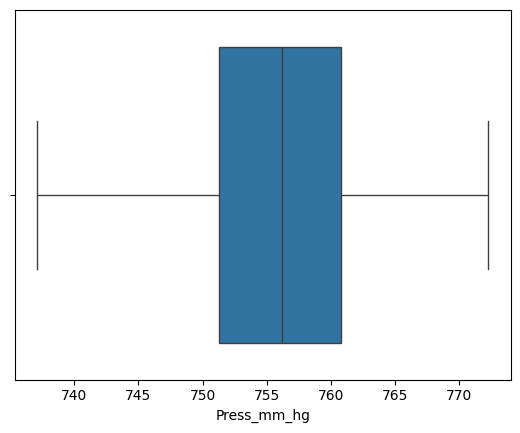

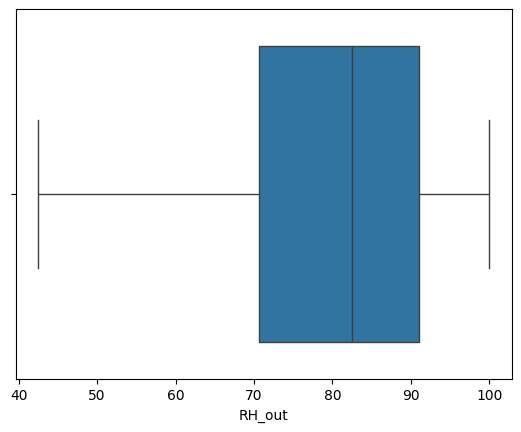

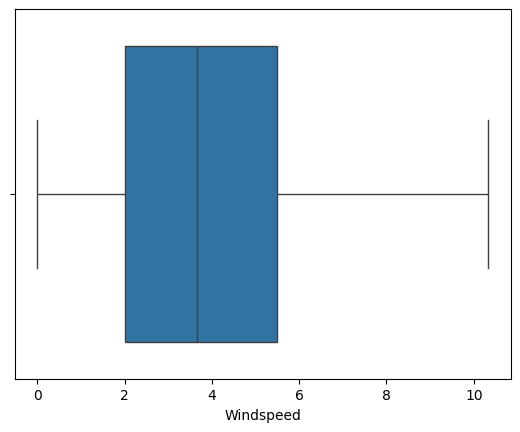

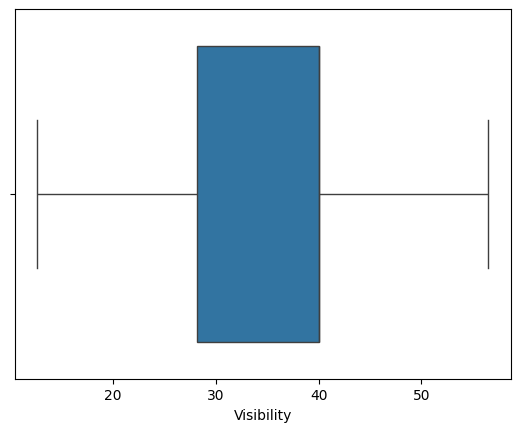

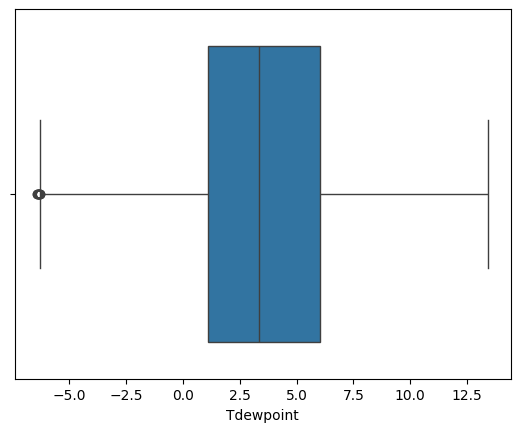

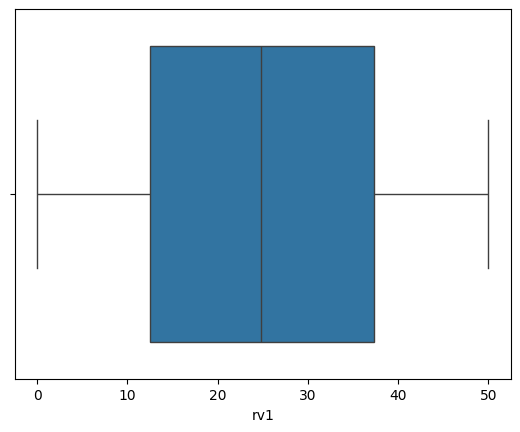

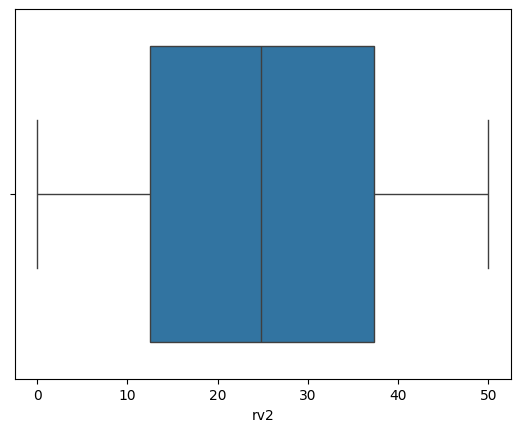

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
  sns.boxplot(data=df, x=column)
  plt.show()

CREATING DIFFERENT PLOTS

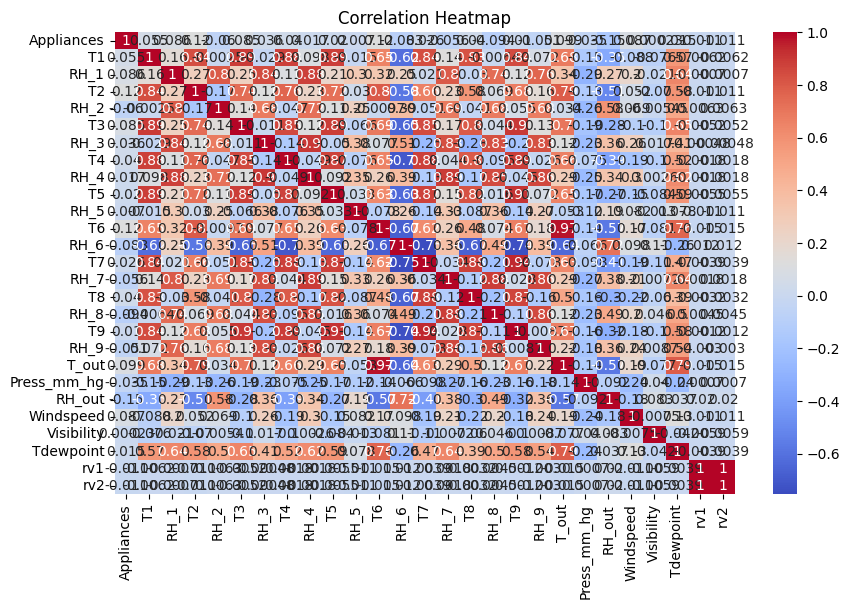

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe (assuming your file is named 'energydata_complete.csv')
df = pd.read_csv('/content/energydata_complete.csv')

filterd_x = df[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
plt.figure(figsize=(10, 6))
sns.heatmap(filterd_x.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

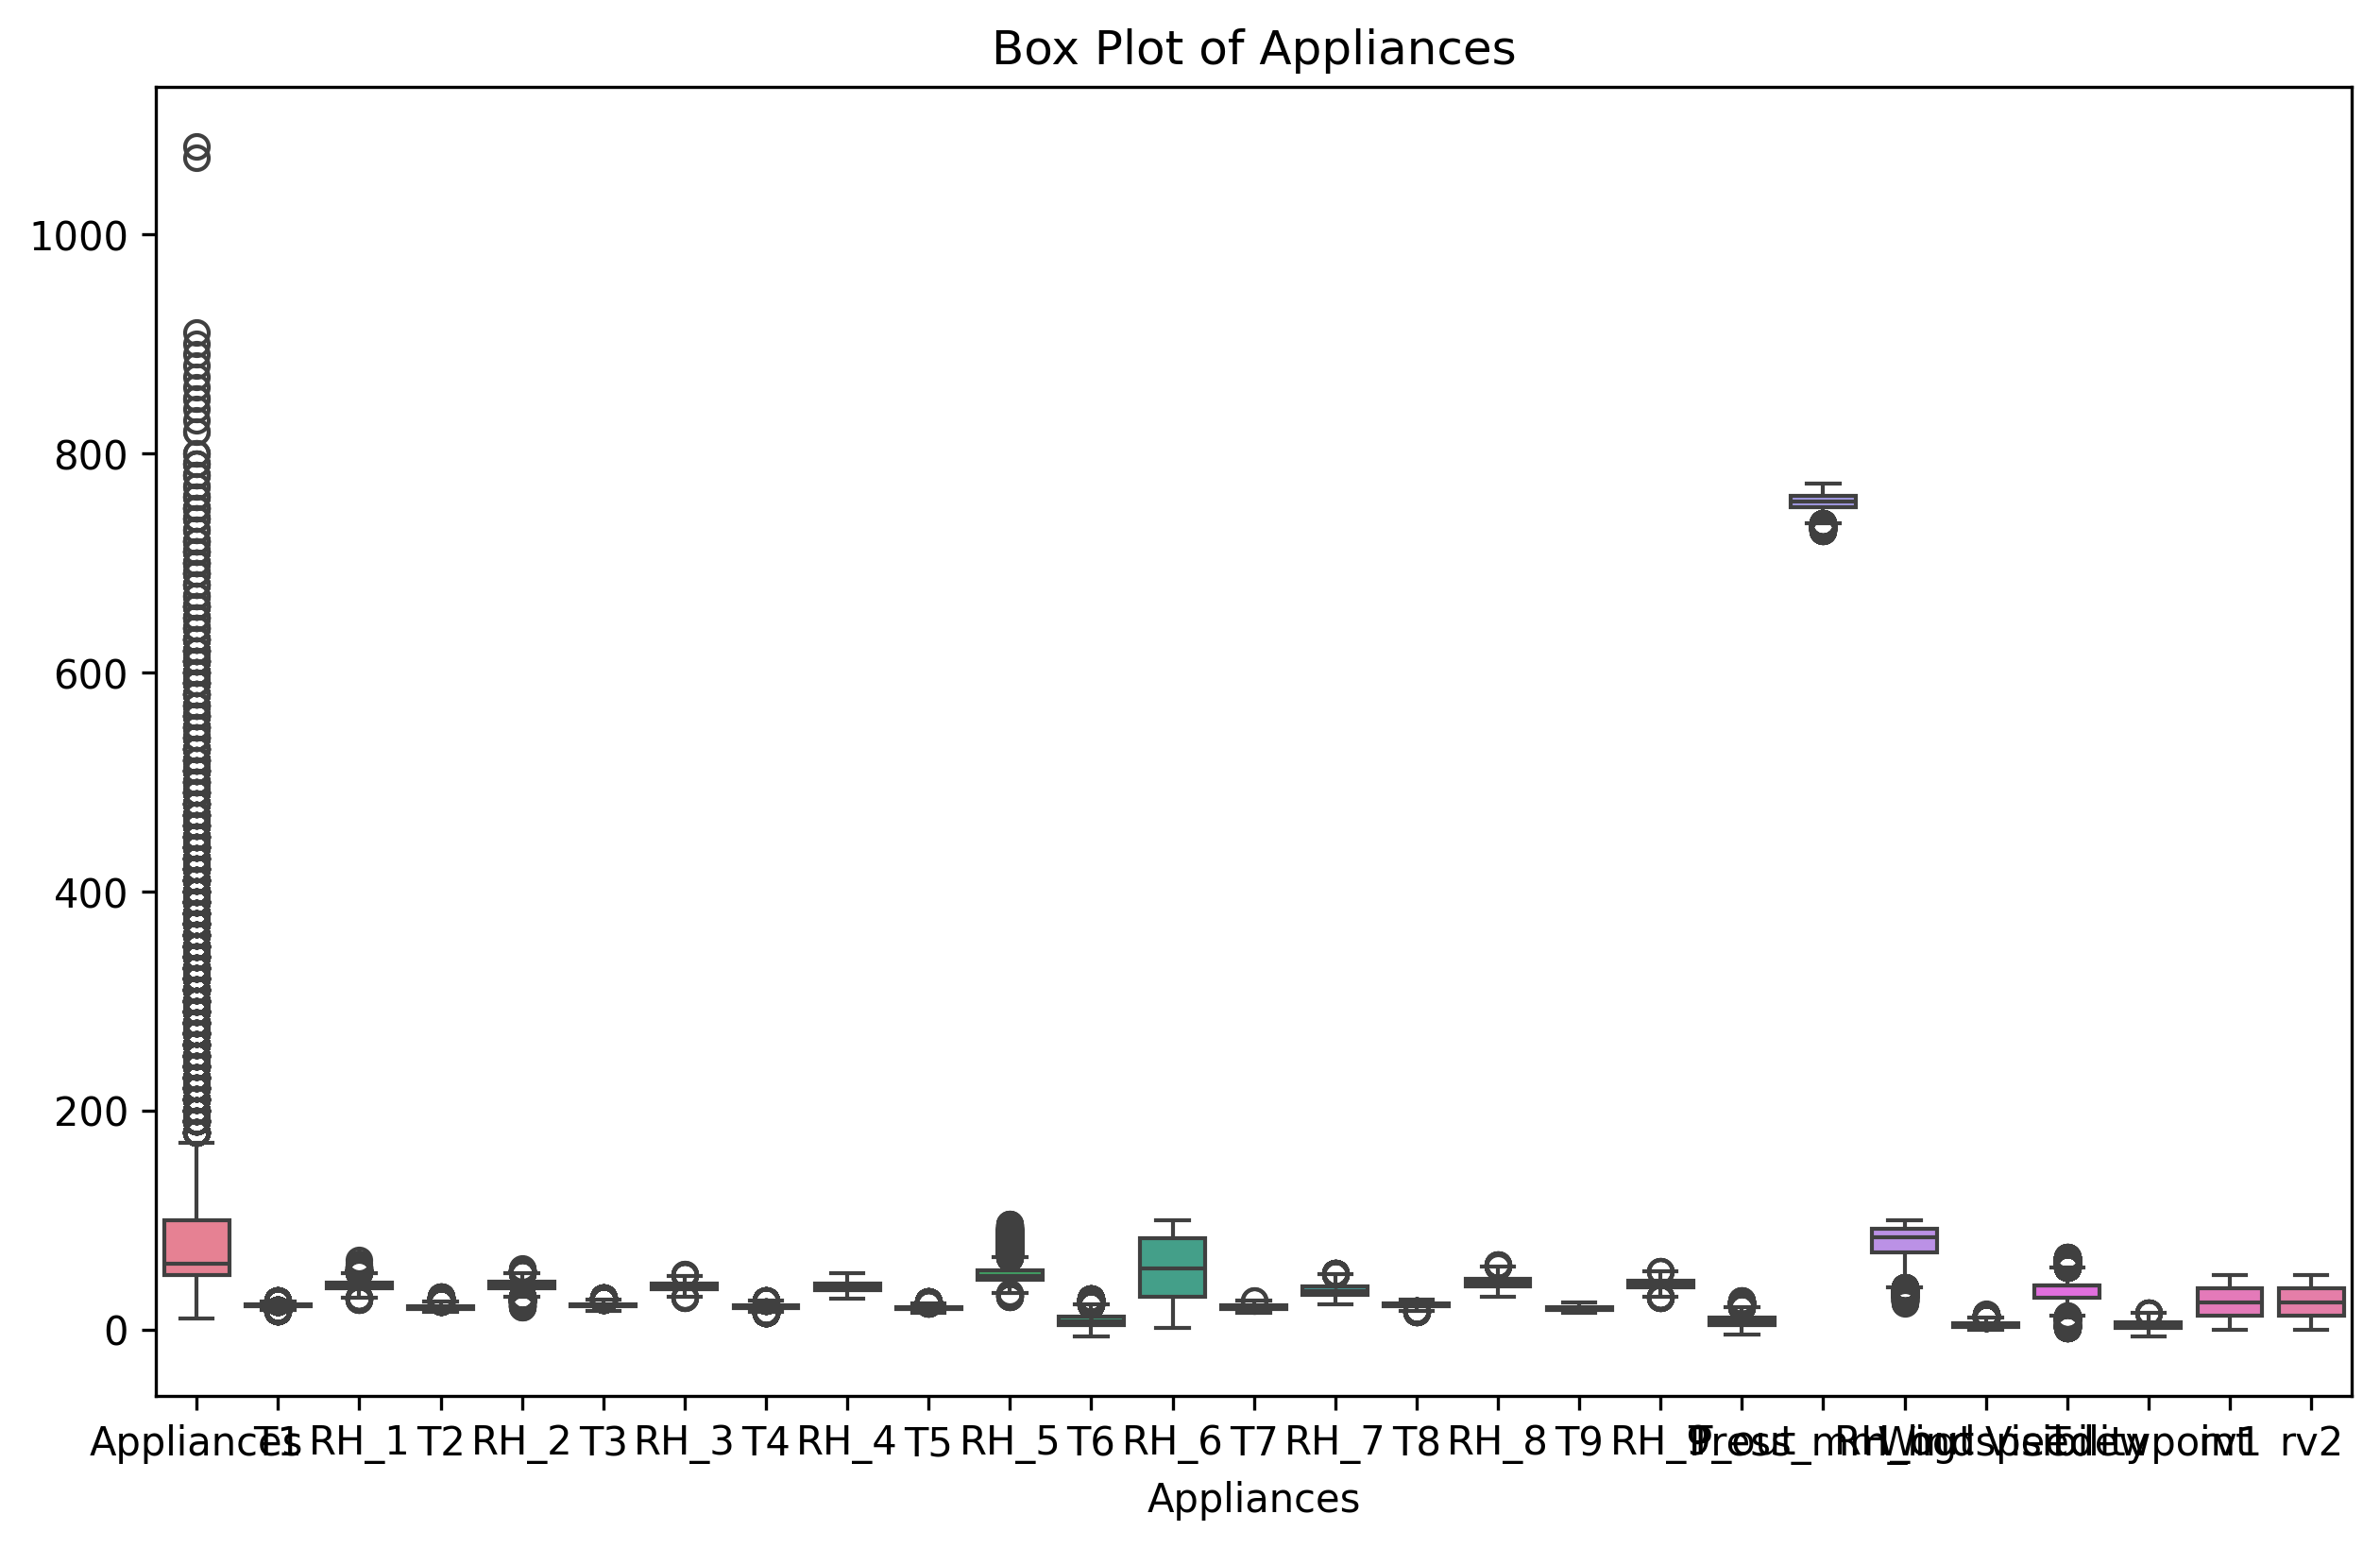

In [11]:
lst = filterd_x[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
plt.figure(figsize=(10, 6),dpi=300)
sns.boxplot(data=lst)
plt.title('Box Plot of Appliances')
plt.xlabel('Appliances')
plt.show()



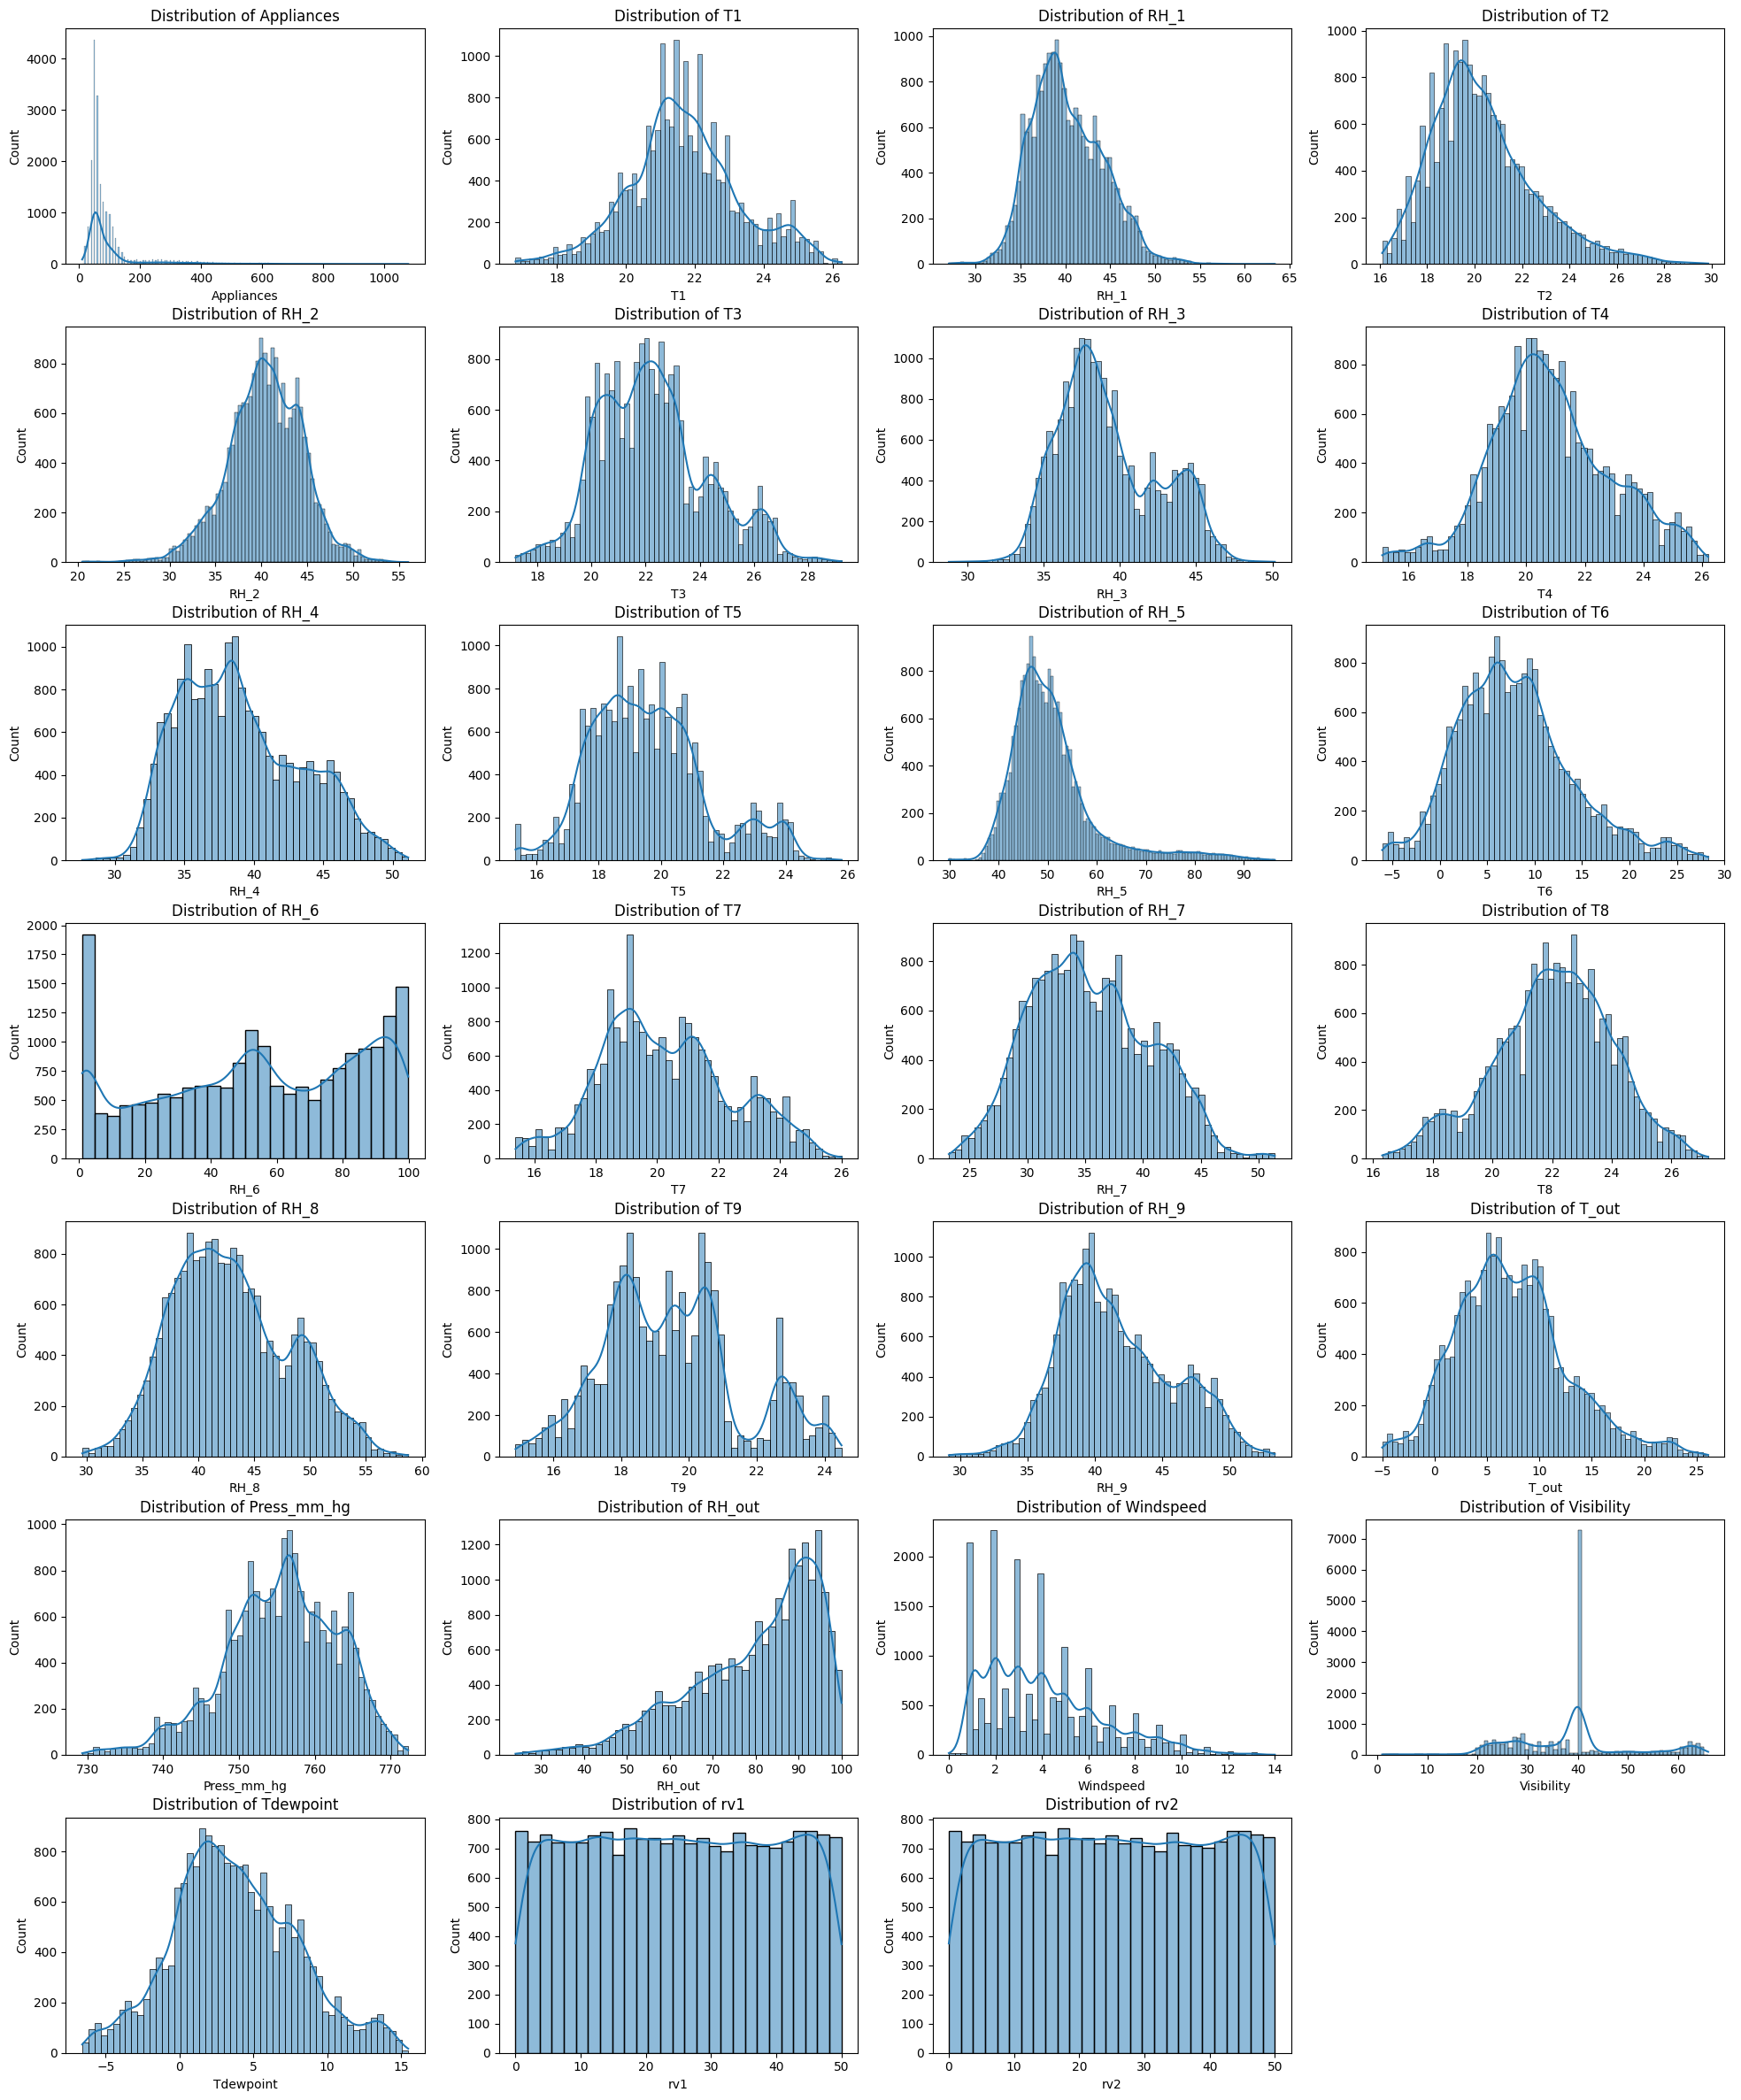

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(7, 4, figsize=(20, 24))
fig.tight_layout(pad=3)
n = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
row, col_num = 0, 0
for i, col in enumerate(n):
    sns.histplot(df[col], kde=True, ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')
    col_num += 1
    if col_num == 4:
        col_num = 0
        row += 1
for i in range(col_num, 4):
    fig.delaxes(ax[row, i])
plt.show()

SKEWNESS


In [17]:
df1.select_dtypes(include='number').skew()

Appliances     1.156157
lights         0.000000
T1             0.090541
RH_1           0.396652
T2             0.634604
RH_2          -0.297085
T3             0.383435
RH_3           0.465613
T4             0.168493
RH_4           0.444614
T5             0.534076
RH_5           0.728294
T6             0.456428
RH_6          -0.241961
T7             0.254697
RH_7           0.237275
T8            -0.256151
RH_8           0.305941
T9             0.382711
RH_9           0.368796
T_out          0.398211
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.790130
Visibility     0.052751
Tdewpoint      0.239017
rv1            0.004945
rv2            0.004945
dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
ss=StandardScaler()

In [22]:
x=df.drop('Windspeed',axis=1)
y=df['Windspeed']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15788, 28)
(3947, 28)
(15788,)
(3947,)


In [28]:
numerical_features = x_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

In [29]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [30]:
print("\n Training models,")
models={'Linear Regression':LinearRegression(),'Decision Tree':DecisionTreeRegressor(),'Random Forest':RandomForestRegressor(random_state=42),'DT':DecisionTreeRegressor(),'Gradient Boosting':GradientBoostingRegressor(random_state=42),'SVR':SVR()}
resuilt={}


 Training models,


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [32]:
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)
train_data = train_data.dropna(subset=[y_train.name])
test_data = test_data.dropna(subset=[y_test.name])
x_train = train_data.drop(columns=[y_train.name])
y_train = train_data[y_train.name]
x_test = test_data.drop(columns=[y_test.name])
y_test = test_data[y_test.name]


In [33]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object', 'category']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R² Score = {r2:.4f}")

Linear Regression: R² Score = 0.3778
Decision Tree: R² Score = 0.9521
Random Forest: R² Score = 0.9827
DT: R² Score = 0.9526
Gradient Boosting: R² Score = 0.7342
SVR: R² Score = 0.7770


In [50]:
print("\Training Models...")
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}
results = {}


\Training Models...


In [58]:
for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  r2=r2_score(y_test,y_pred)

In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error

# ... your existing code ...

results = {
    "MAE": mean_absolute_error(y_test, y_pred), # Now mean_absolute_error is accessible
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}
print(results)

{'MAE': 0.8318177541770044, 'MSE': 1.3173898557433328, 'RMSE': np.float64(1.147776047730276), 'R2': 0.7837164093913194}


In [57]:
print("\nModel Performance:")
for model_name, metric_value in results.items():
  print(f"\n{model_name}: {metric_value:.4f}")



Model Performance:

MAE: 0.8318

MSE: 1.3174

RMSE: 1.1478

R2: 0.7837
